In [1]:
library(Seurat)
library(dplyr)
library(reticulate)
library(Matrix)
library(stringr)
library(tximport)
library(readr)
library(harmony)
library(reshape2)
library(ggplot2)
library(repr)
library(cowplot)
library(tidyverse)
library(rstatix)
library(ggpubr)
library(multcomp)
library(ggrepel)
library(pals)
theme_set(theme_cowplot())
options(repr.plot.width=10, repr.plot.height=10)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Rcpp

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter



Attachin

In [94]:
setwd('/home/jovyan/data/covid_nasal/datasets')
covid_US<-readRDS("covid_US.RDS")

In [95]:
setwd('/home/jovyan/data/covid_nasal/datasets')
covid<-readRDS("covid_build_May2021.RDS")

In [96]:
Idents(covid)<-"Treatment"
covid_S<-subset(covid, id = "Pos")

In [97]:
covid_S<-NormalizeData(covid_S, verbose = FALSE)
covid_S <- FindVariableFeatures(covid_S, selection.method = "vst", 
        nfeatures = 2000, verbose = FALSE)

In [98]:
anchors <- FindTransferAnchors(reference = covid_US, query = covid_S, 
    dims = 1:30)
predictions <- TransferData(anchorset = anchors, refdata = covid_US$initial_clustering, 
    dims = 1:30)
covid_S <- AddMetaData(covid_S, metadata = predictions)
covid_S@meta.data$initial_clustering<-covid_S@meta.data$predicted.id

Performing PCA on the provided reference using 2000 features as input.

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 22512 anchors

Filtering anchors

	Retained 12933 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [100]:
setwd('/home/jovyan/data/covid_nasal')
df1<-dplyr::select(covid_US@meta.data, initial_clustering)
df2<-dplyr::select(covid_S@meta.data, initial_clustering)

In [101]:
df<-rbind(df1, df2)

In [102]:
write.csv(df, "predicted_ids.csv")

In [103]:
anchors <- FindIntegrationAnchors(object.list = c(covid_US, covid_S), dims = 1:30)

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 28495 anchors

Filtering anchors

	Retained 13453 anchors



In [104]:
integrated <- IntegrateData(anchorset = anchors, dims = 1:30)

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [105]:
integrated <- ScaleData(integrated, verbose = FALSE)
integrated <- RunPCA(integrated, npcs = 30, verbose = FALSE)
integrated <- RunUMAP(integrated, reduction = "pca", dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:31:15 UMAP embedding parameters a = 0.9922 b = 1.112

14:31:15 Read 28346 rows and found 30 numeric columns

14:31:15 Using Annoy for neighbor search, n_neighbors = 30

14:31:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:31:19 Writing NN index file to temp file /tmp/RtmpYpR9v8/file1b45cb9e3f

14:31:19 Searching Annoy index using 1 thread, search_k = 3000

14:31:29 Annoy recall = 100%

14:31:30 Commencing smooth kNN distance calibration using 1 thread

14:31:32 Initializing from

In [106]:
integrated<-FindNeighbors(integrated, dims = 1:20)
integrated<-FindClusters(integrated, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 28346
Number of edges: 1036288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9343
Number of communities: 21
Elapsed time: 5 seconds


1 singletons identified. 20 final clusters.



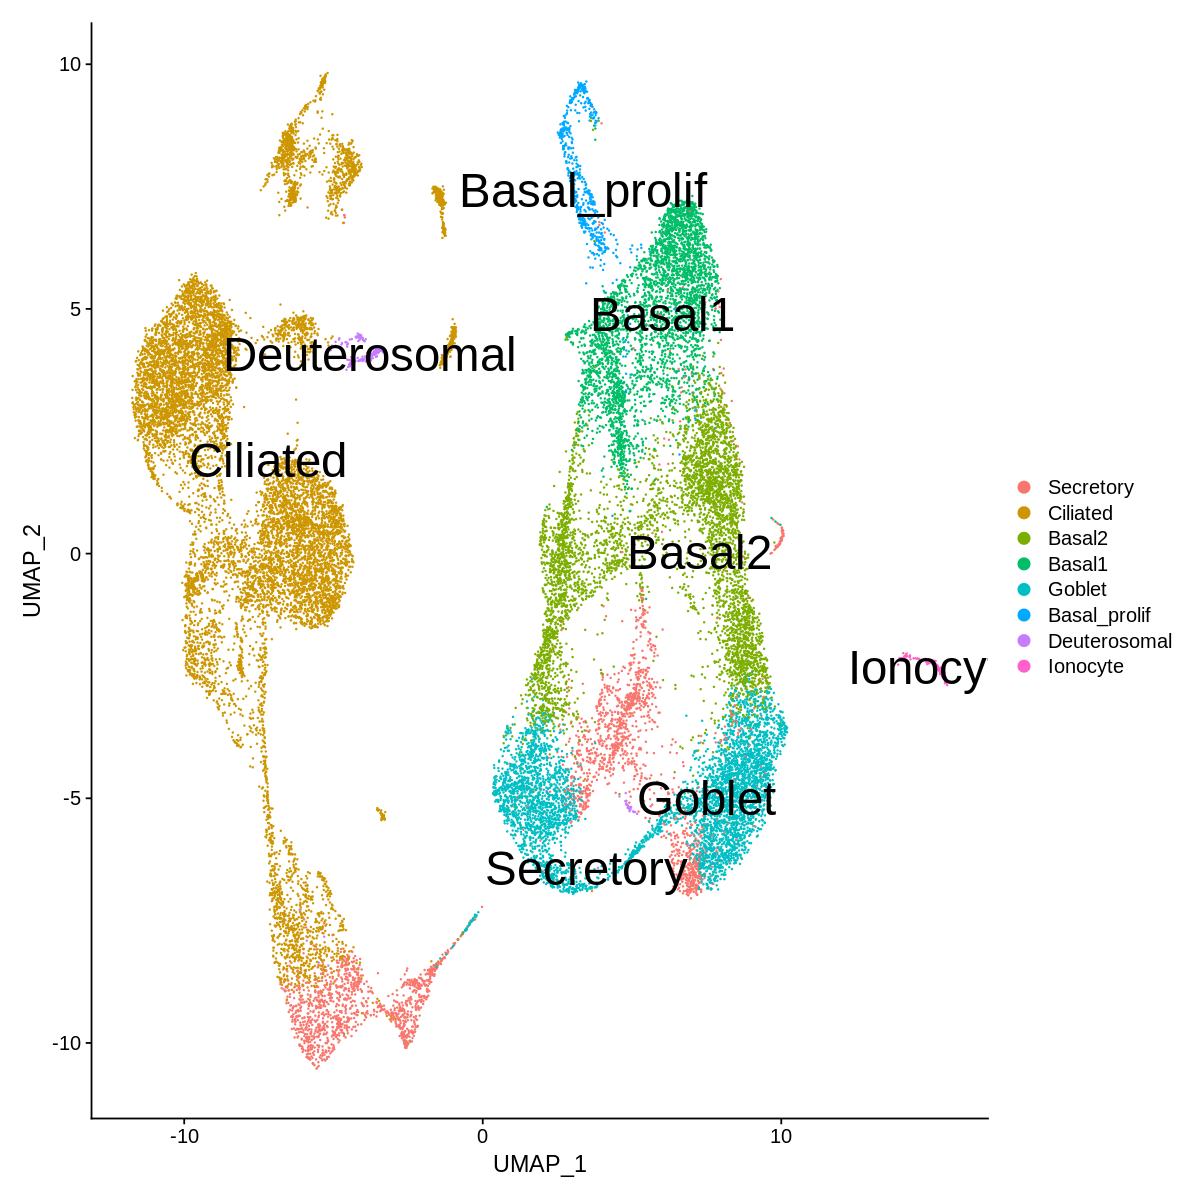

In [107]:
Idents(integrated)<-"initial_clustering"
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(integrated, reduction = "umap", label = TRUE, label.size = 10)

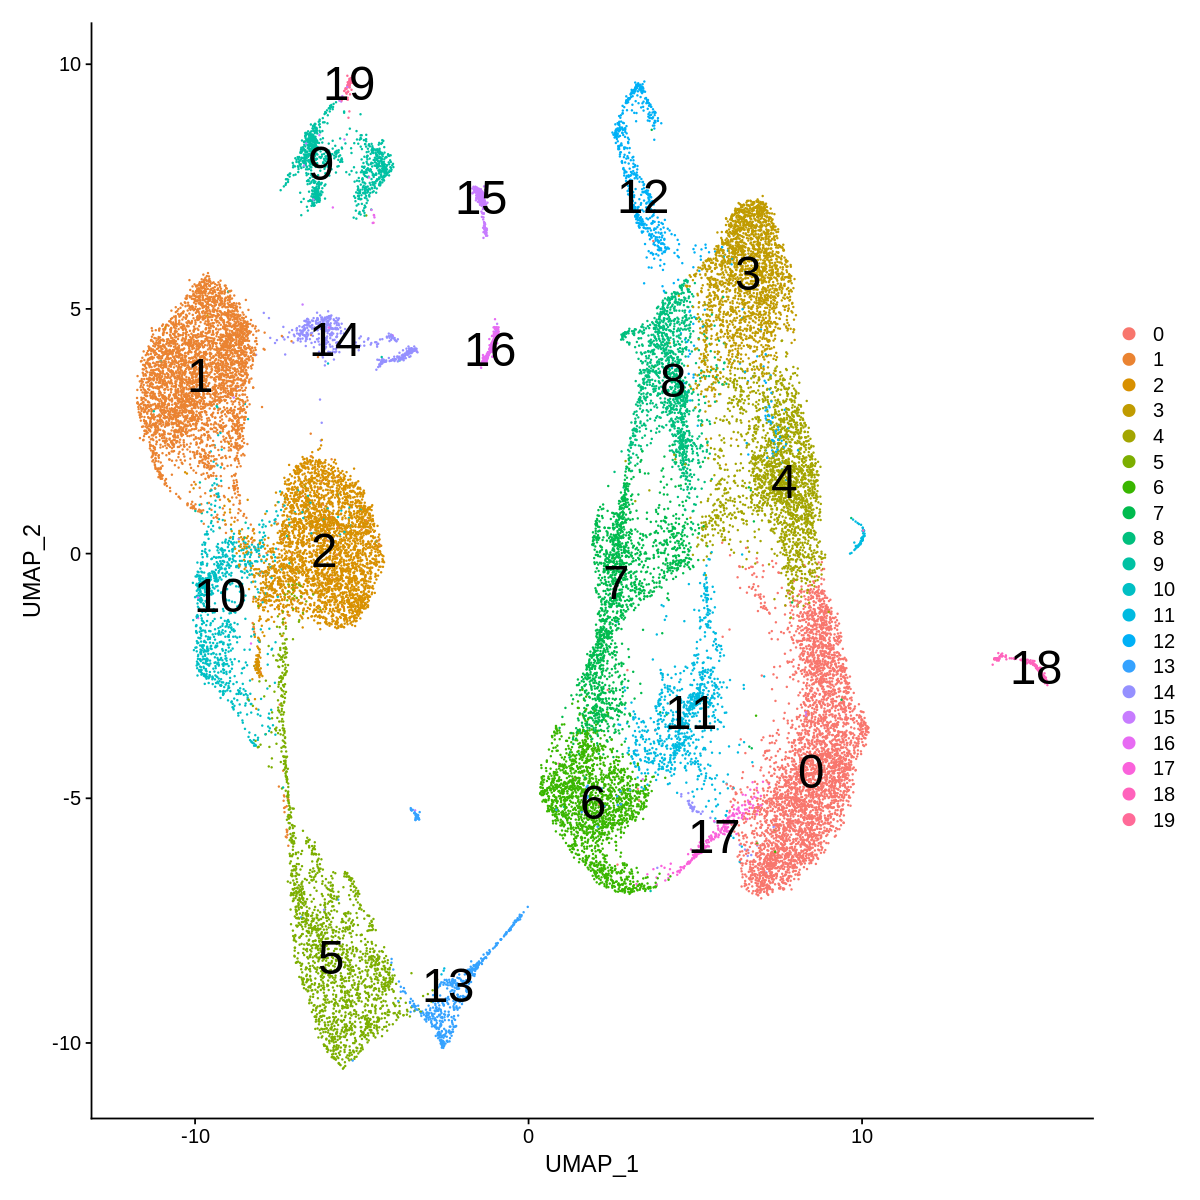

In [108]:
Idents(integrated)<-"seurat_clusters"
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(integrated, reduction = "umap", label = TRUE, label.size = 10)

In [109]:
###Not run
Idents(integrated)<-"seurat_clusters"
new.cluster.ids <- c("Goblet", "Ciliated", "Ciliated", "Basal1", "Basal2", "Ciliated",
                    "Goblet", "Basal2", "Basal1", "Ciliated", "Ciliated",
                    "Secretory", "Basal_prolif", "Secretory", "Deuterosomal", "Ciliated",
                    "Ciliated", "Goblet", "Ionocytes", "Ciliated")
                    
names(new.cluster.ids) <- levels(integrated)
integrated <- RenameIdents(integrated, new.cluster.ids)
integrated[["initial_clustering_transfer"]] <- Idents(integrated)

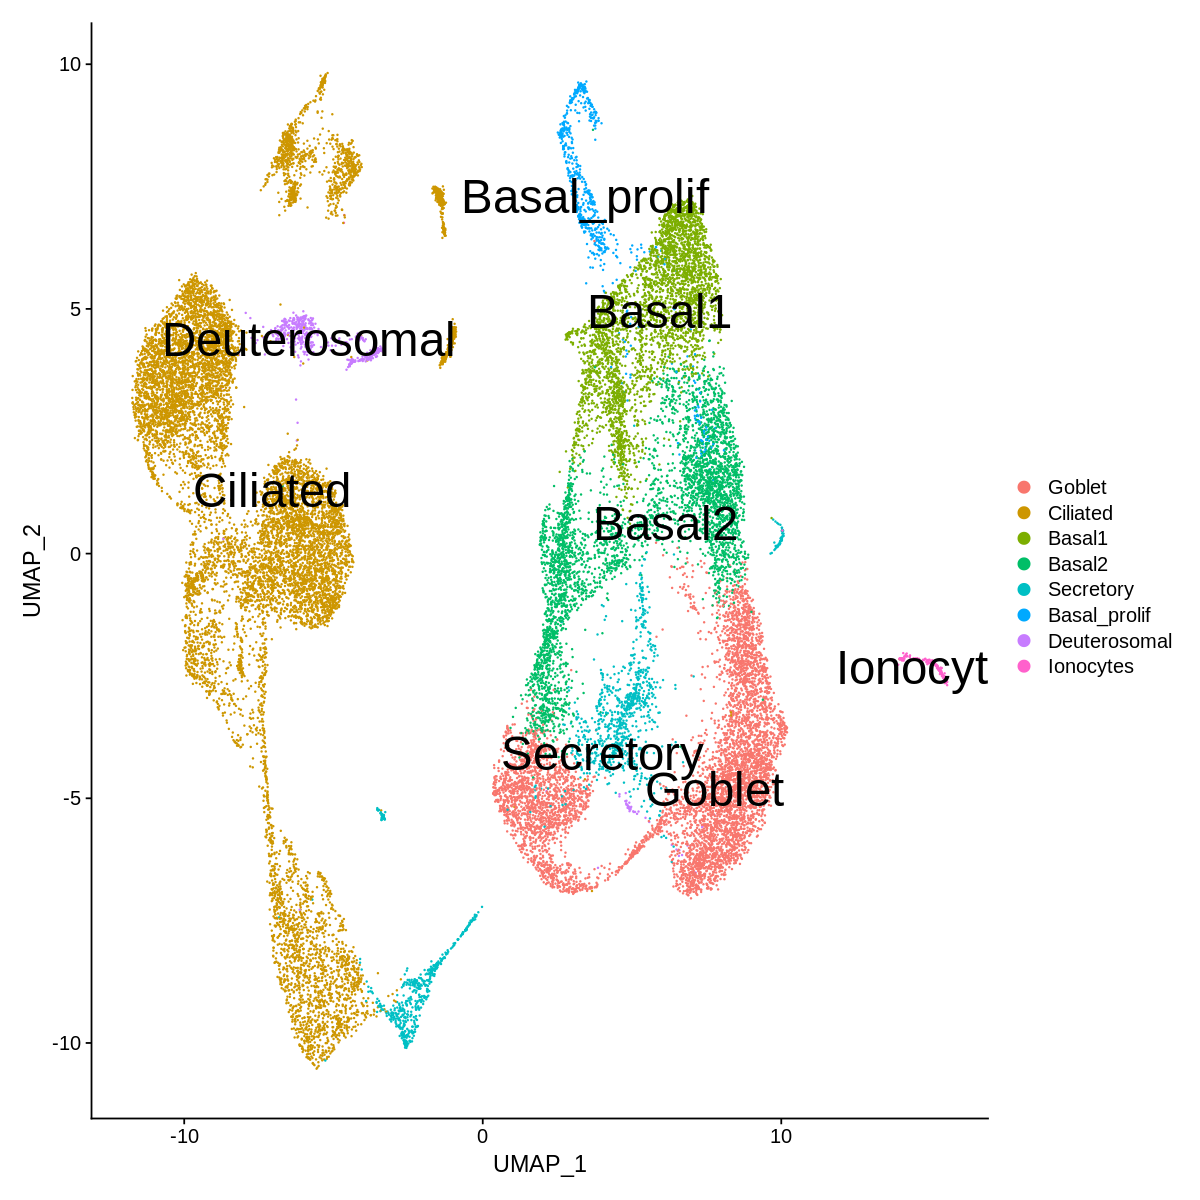

In [110]:
Idents(integrated)<-"initial_clustering_transfer"
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(integrated, reduction = "umap", label = TRUE, label.size = 10)

In [116]:
integrated@meta.data$initial_clustering_transfer <- factor(integrated@meta.data$initial_clustering_transfer, 
                                              levels = rev(c("Basal1", "Basal2", "Basal_prolif", 
                                                             "Secretory",
                                                             "Goblet",
                                                              "Ciliated",
                                                             "Deuterosomal", "Ionocytes")))

In [117]:
levels(integrated@meta.data$initial_clustering_transfer)

[1] "Ionocytes"    "Deuterosomal" "Ciliated"     "Goblet"       "Secretory"   
[6] "Basal_prolif" "Basal2"       "Basal1"

In [118]:
Idents(integrated)<-"initial_clustering_transfer"


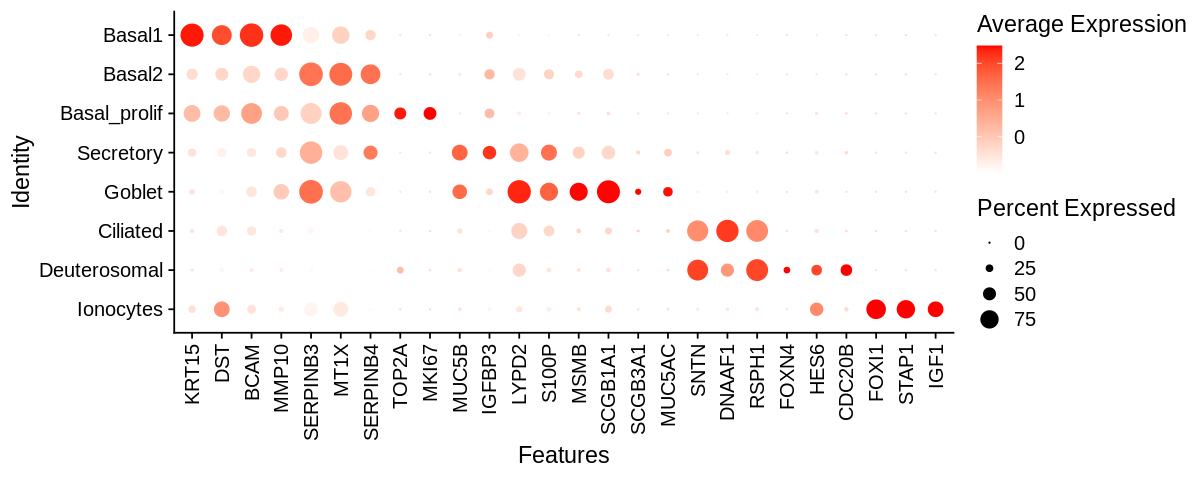

In [121]:
options(repr.plot.width=10, repr.plot.height=4)

DefaultAssay(integrated)<-'RNA'

nasal_markers<-c("KRT15", "DST", "BCAM", "MMP10",   #basal 1
                 "SERPINB3", "MT1X", "SERPINB4",  #basal2
                 "TOP2A", "MKI67", #prolif
                 "MUC5B", "IGFBP3", "LYPD2", "S100P",
                 "MSMB", "SCGB1A1", "SCGB3A1",  "MUC5AC", #club
                 "SNTN", "DNAAF1", "RSPH1",   #ciliated
                 "FOXN4", "HES6", "CDC20B",
                 "FOXI1", "STAP1", "IGF1")

DotPlot(integrated, features = nasal_markers, cols = c("white", "red"))+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

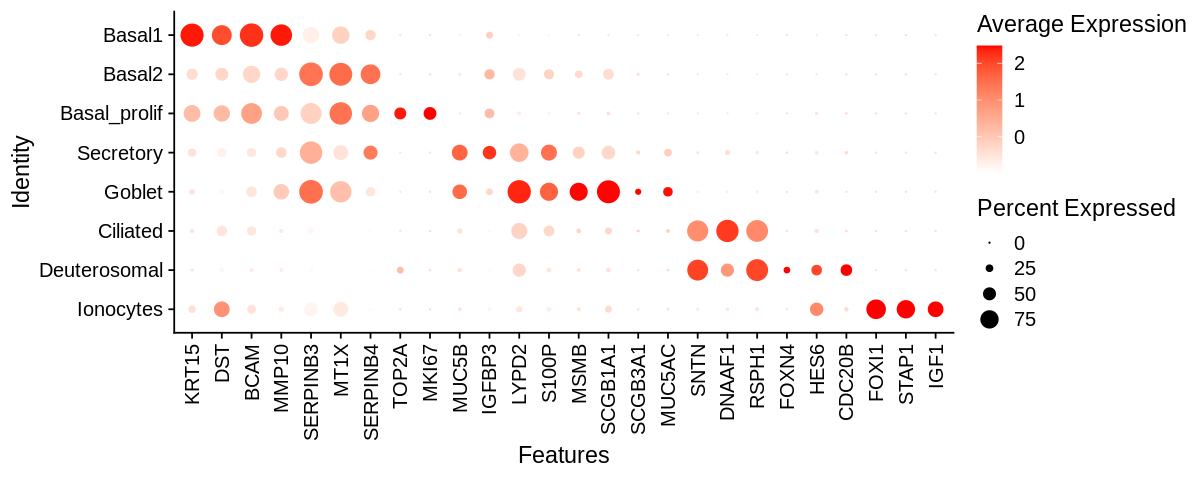

In [121]:
options(repr.plot.width=10, repr.plot.height=4)

DefaultAssay(integrated)<-'RNA'

nasal_markers<-c("KRT15", "DST", "BCAM", "MMP10",   #basal 1
                 "SERPINB3", "MT1X", "SERPINB4",  #basal2
                 "TOP2A", "MKI67", #prolif
                 "MUC5B", "IGFBP3", "LYPD2", "S100P",
                 "MSMB", "SCGB1A1", "SCGB3A1",  "MUC5AC", #club
                 "SNTN", "DNAAF1", "RSPH1",   #ciliated
                 "FOXN4", "HES6", "CDC20B",
                 "FOXI1", "STAP1", "IGF1")

DotPlot(integrated, features = nasal_markers, cols = c("white", "red"))+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

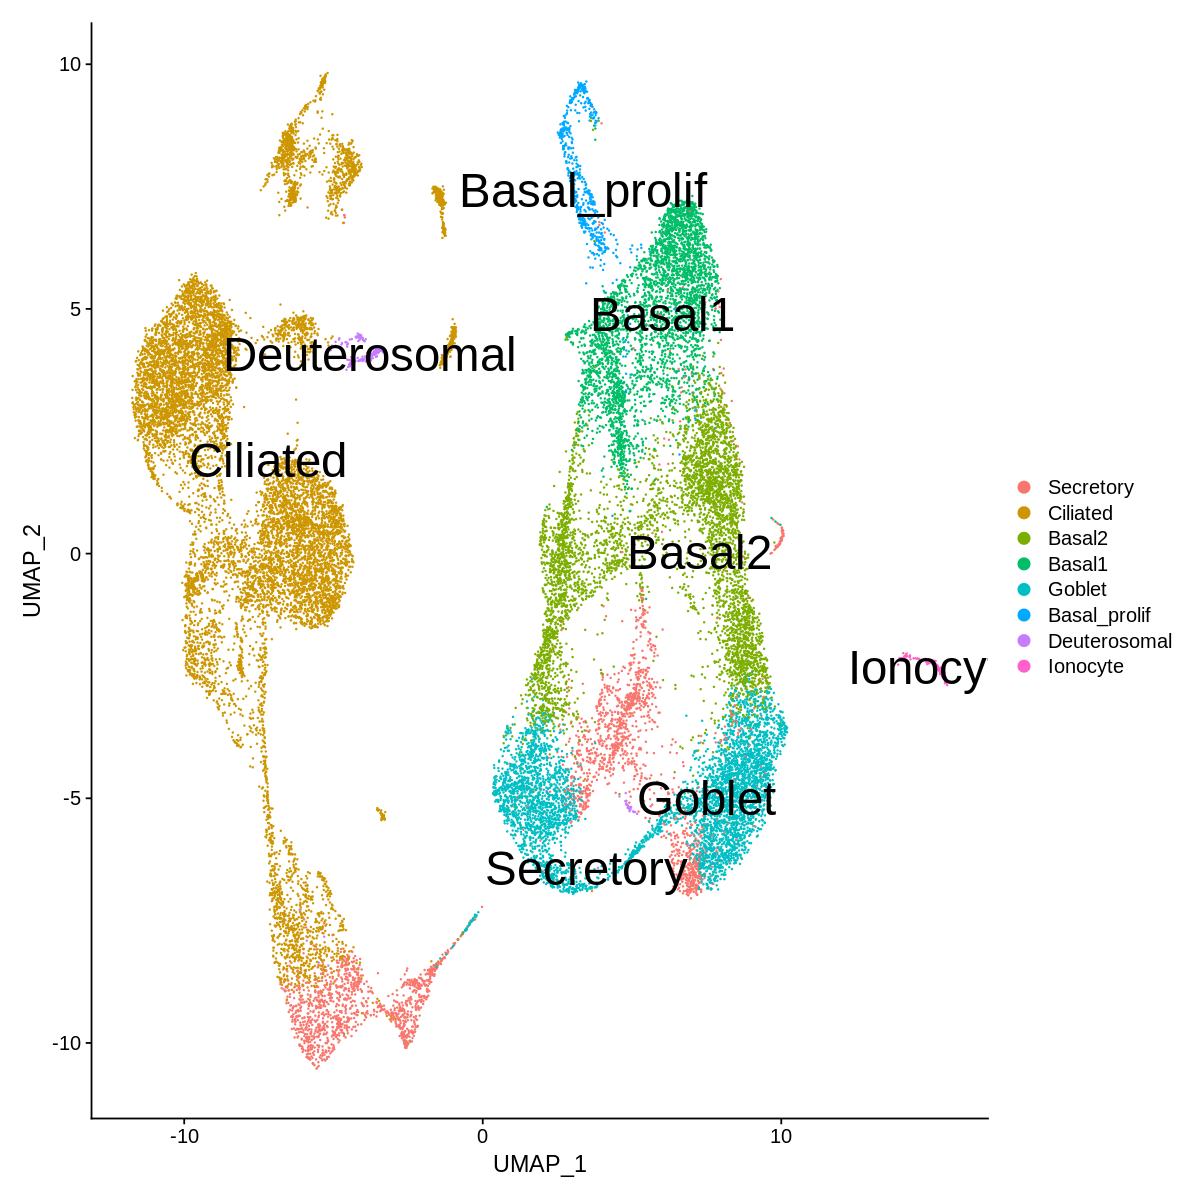

In [192]:
Idents(integrated)<-"initial_clustering"
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(integrated, reduction = "umap", label = TRUE, label.size = 10)

In [206]:
setwd('/home/jovyan/data/covid_nasal/datasets')
saveRDS(covid, "covid_integrated.RDS")


***Plotting***


In [2]:
setwd('/home/jovyan/data/covid_nasal/datasets')
covid<-readRDS("covid_integrated.RDS")

In [202]:
covid@meta.data$initial_clustering <- factor(covid@meta.data$initial_clustering, 
                                              levels = rev(c("Basal1", "Basal2", "Basal_prolif", 
                                                             "Secretory",
                                                             "Goblet",
                                                              "Ciliated",
                                                             "Deuterosomal", "Ionocyte")))

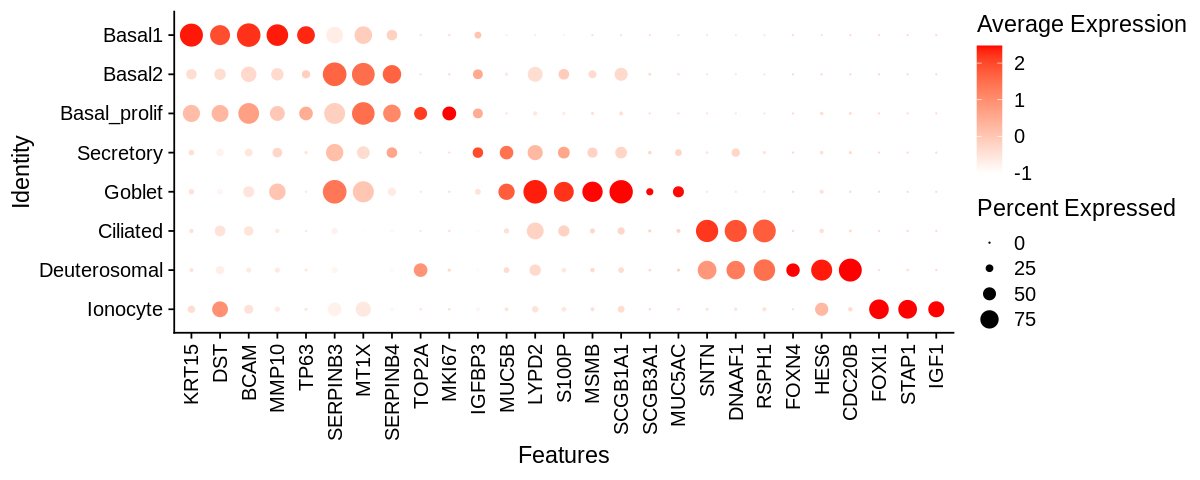

In [21]:
options(repr.plot.width=10, repr.plot.height=4)
Idents(covid)<-"initial_clustering"
nasal_markers<-c("KRT15", "DST", "BCAM", "MMP10",'TP63',   #basal 1
                 "SERPINB3", "MT1X", "SERPINB4",  #basal2
                 "TOP2A", "MKI67", #prolif
                  "IGFBP3", "MUC5B","LYPD2", "S100P",
                 "MSMB", "SCGB1A1", "SCGB3A1",  "MUC5AC", #club
                 "SNTN", "DNAAF1", "RSPH1",   #ciliated
                 "FOXN4", "HES6", "CDC20B",
                 "FOXI1", "STAP1", "IGF1")


DotPlot(covid, features = nasal_markers, cols = c("white", "red"))+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


setwd('/home/jovyan/data/covid_nasal/figures')

ggsave("nasal_marker_dotplot.png", plot = last_plot(), device = NULL, path = NULL,width = 10, height = 4, scale = 1)

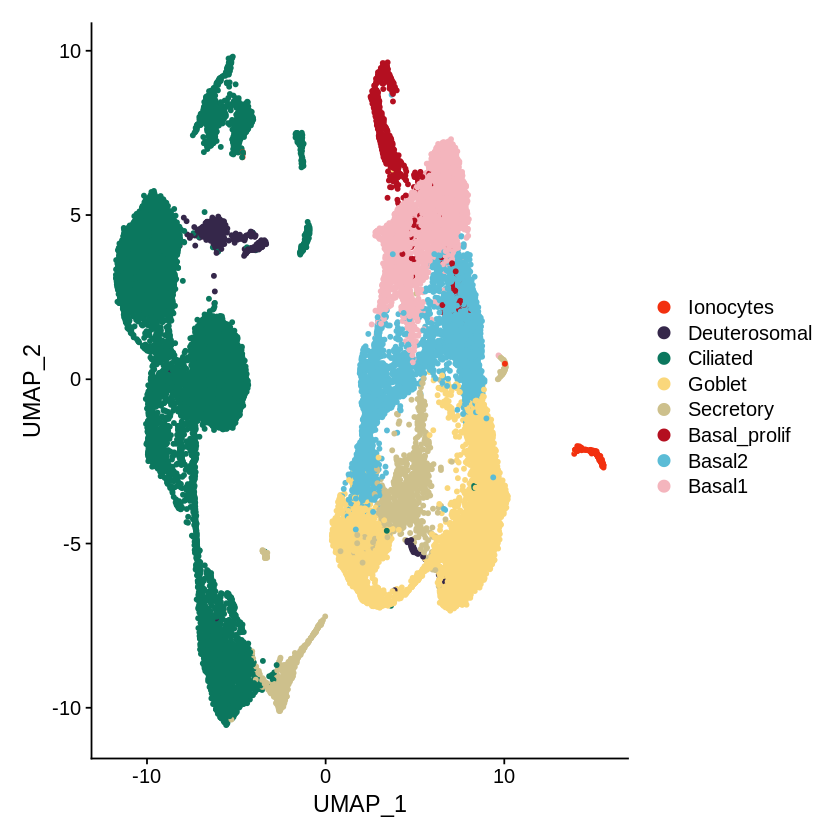

In [205]:
options(repr.plot.width=7, repr.plot.height=7)
Idents(integrated)<-"initial_clustering_transfer"
DimPlot(integrated, reduction = "umap", 
        label = FALSE, pt.size =1,
        cols = rev(c("#85D4E3", "#F4B5BD",  "#5BBCD6","#B40F20", "#CDC08C", "#FAD77B", "#0B775E", "#35274A", "#F2300F")))

setwd('/home/jovyan/data/covid_nasal/figures')
ggsave("nasal_UMAP.png", plot = last_plot(), device = NULL, path = NULL,width = 10, height = 10,  scale = 1)


***Proportions***


In [8]:
#imported from second workbook

setwd('/home/jovyan/data/covid_nasal/datasets')
covid <- readRDS("covid_integrated.RDS")

In [12]:
props <- covid@meta.data %>% dplyr::select(initial_clustering, sample_id, Treatment)

In [13]:
props<-props %>% group_by(sample_id, Treatment) %>% add_tally(name = 'total_per_sample')
props<-props %>% group_by(initial_clustering, sample_id, Treatment) %>% add_tally(name = 'total_per_celltype_in_sample')

In [14]:
props$proportion <- props$total_per_celltype_in_sample/props$total_per_sample

In [15]:
props<-props %>% dplyr::group_by(initial_clustering, Treatment) %>% dplyr::summarise(mean = mean(proportion))

`summarise()` has grouped output by 'initial_clustering'. You can override using the `.groups` argument.



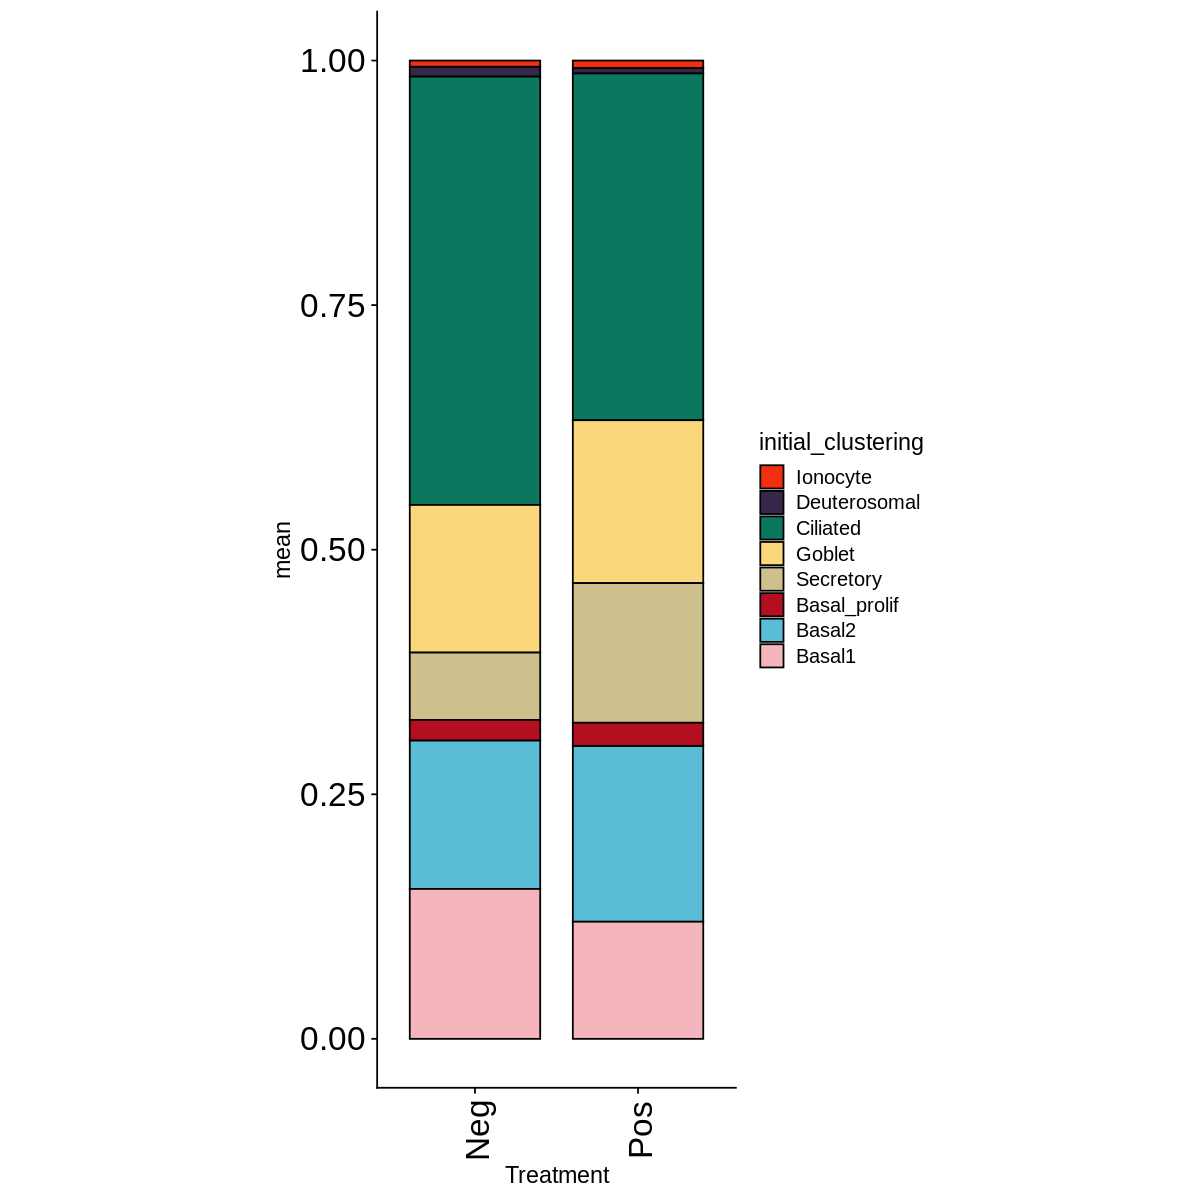

In [17]:
ggplot(props, aes(x=Treatment, y = mean, fill=initial_clustering))+ 
    geom_bar(position="fill", stat="identity", width = 0.8, colour = "black")+

  theme(axis.text.x = element_text(angle=65, vjust=0.6))+
      theme(aspect.ratio = 3/1)+ 
  theme(axis.text.x = element_text(angle = 90, size = 20))+
theme(axis.text.y = element_text(size = 20)) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background= element_blank())+
scale_fill_manual(values = rev(c("#85D4E3", "#F4B5BD",  "#5BBCD6","#B40F20", "#CDC08C", "#FAD77B", "#0B775E", "#35274A", "#F2300F")))

setwd('/home/jovyan/data/covid_nasal/figures')
ggsave("proportions.png", plot = last_plot(), device = NULL, path = NULL,width = 5, height = 5,  scale = 1)



***Restart***



In [42]:
setwd('/home/jovyan/data/covid_nasal/datasets')
covid<-readRDS("covid_integrated.RDS")

In [43]:
Idents(covid)<-'Treatment'

covid_S<-subset(covid, id = "Pos")
covid_US<-subset(covid, id = "Neg")

In [44]:
covid_S@meta.data$initial_clustering <- factor(covid_S@meta.data$initial_clustering, 
                                              levels = rev(c("Basal1", "Basal2", "Basal_prolif", "Goblet",
                                                             "Secretory", "Ciliated",
                                                             "Deuterosomal", "Ionocyte")))

In [46]:
#Are viral transcripts differentially expressed between clusters?
Idents(covid_S)<-'initial_clustering'
stats<-FindAllMarkers(covid_S, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster Ionocyte

Calculating cluster Deuterosomal

Calculating cluster Ciliated

Calculating cluster Secretory

Calculating cluster Goblet

Calculating cluster Basal_prolif

Calculating cluster Basal2

Calculating cluster Basal1



In [49]:
setwd('/home/jovyan/data/covid_nasal/stats')
write.csv(stats, 'DEGs_between_infected_clusters.csv')

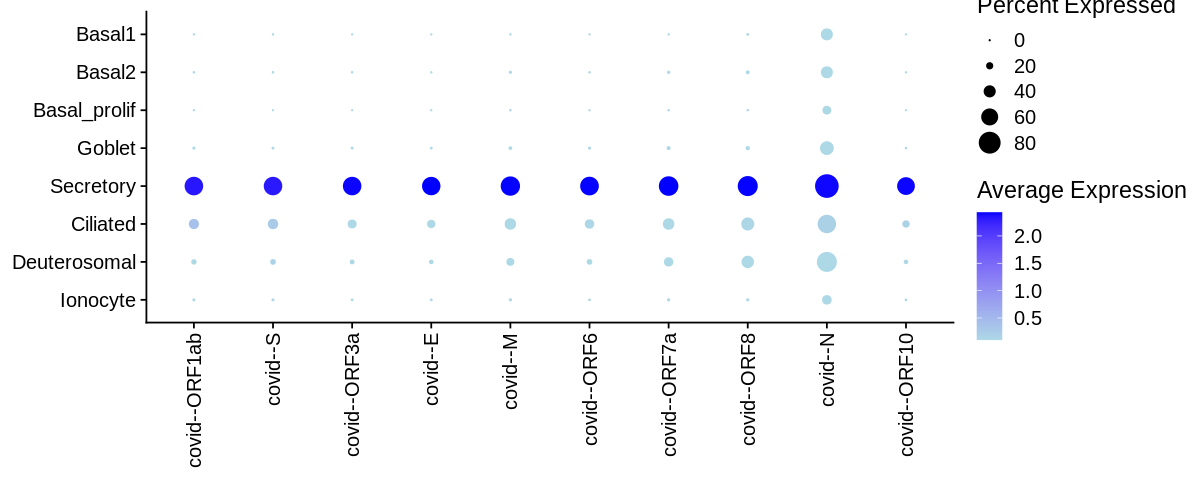

In [6]:
options(repr.plot.width=10, repr.plot.height=4)
nasal_markers<-c("covid--ORF1ab", "covid--S", "covid--ORF3a",
                               "covid--E", "covid--M", "covid--ORF6", "covid--ORF7a", "covid--ORF8",
                               "covid--N", "covid--ORF10")

Idents(covid_S)<-"initial_clustering"

DotPlot(covid_S, features = nasal_markers, cols = c("lightblue", "blue"), col.min = 0.1)+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
theme(axis.title.x = element_blank()) + theme(axis.title.y = element_blank())

setwd('/home/jovyan/data/covid_nasal/figures')
ggsave("infection_dotplot.png", plot = last_plot(), device = NULL, path = NULL,width = 10, height = 4,  scale = 1)

In [17]:
covid_S_markers <- FindAllMarkers(covid_S, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster Ionocyte

Calculating cluster Deuterosomal

Calculating cluster Ciliated





***Infected vs uninfected cells***



In [2]:
setwd('/home/jovyan/data/covid_nasal/datasets')
covid<-readRDS("covid_integrated.RDS")

In [4]:
##Create a new identity class based on whether cell is infected
uninfected <- subset(x = covid, 
                     subset = `covid--ORF1ab` == 0 &
                     `covid--S` == 0 &
                     `covid--ORF3a` == 0 &
                     `covid--E` == 0 &
                     `covid--M` == 0 &
                     `covid--ORF6` == 0 &
                     `covid--ORF7a` == 0 &
                     `covid--ORF8` == 0 &
                     `covid--N` == 0 &
                     `covid--ORF10` == 0
                     , slot='counts')

infected_cells<-setdiff(colnames(covid), colnames(uninfected))

Idents(object = covid, cells = Cells(uninfected)) <- 'uninfected'
Idents(object = covid, cells = infected_cells) <- 'infected'

covid[["infection"]] <- Idents(covid)

In [5]:
setwd('/home/jovyan/data/covid_nasal/pySCENIC')
meta <- dplyr::select(covid@meta.data, Treatment, initial_clustering, infection)
write.csv(meta, "meta_covid_nasal.csv")

In [6]:
Idents(covid)<-"Treatment"
covid_US<-subset(covid, id = 'Neg')
covid_S<-subset(covid, id = 'Pos')

In [7]:
covid_S@meta.data$combined<-paste0(covid_S@meta.data$initial_clustering, '-', covid_S@meta.data$infection)

In [8]:
df<-as.data.frame(table(covid_S@meta.data$combined))
df<-tidyr::separate(df, Var1, c("Cell", "infection"), "-")

In [9]:
df2<-df %>% group_by(Cell) %>% mutate(prop = Freq[infection == "infected"] / (Freq[infection == "uninfected"] + Freq[infection == "infected"])) %>%
distinct(Cell, prop)
                                               
                                               
                                               

In [38]:
setwd('/home/jovyan/data/covid_nasal/stats')
write.csv(df, 'proportion_infected.csv')

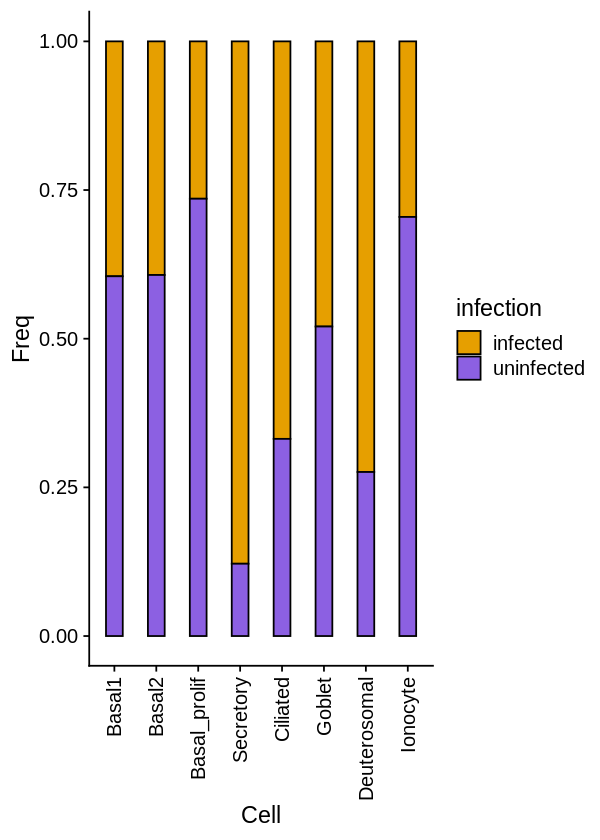

In [26]:
df$Cell <- factor(df$Cell, levels = c("Basal1", "Basal2", "Basal_prolif","Secretory",
                                      "Ciliated", "Goblet",                                  
                                      "Deuterosomal",  "Ionocyte"))

ggplot(df, aes(x=Cell, y = Freq, fill=infection))+ 
    geom_bar(position="fill", stat="identity", width = 0.4, colour = "black")+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
scale_fill_manual(values=rev(c('#8C60E2', "#E69F00")))

options(repr.plot.width=5, repr.plot.height=7)

setwd('/home/jovyan/data/covid_nasal/figures')
ggsave("proportion_infected.png", plot = last_plot(), device = NULL, path = NULL,width = 6, height = 7,  scale = 1)




***Basal IFN score***



In [2]:
setwd('/home/jovyan/data/covid_nasal/datasets')
covid<-readRDS("covid_integrated.RDS")

In [3]:
#Import IFNa gene list from Ziegler paper

setwd('/home/jovyan/data/covid_nasal/')
ifna<-read.csv('Ziegler_IFNa_list.csv')

setwd('/home/jovyan/data/covid_nasal/')
ifng<-read.csv('Ziegler_IFNg_list.csv')

scores<-list()

#extract only the upregulated genes and make them in to a list
ifna<-ifna %>% filter(Upregulated.in == 'IFNA')
scores$ifna<-list(ifna$Gene)

#extract only the upregulated genes and make them in to a list
ifng<-ifng %>% filter(Upregulated.in == 'IFNG')
scores$ifng<-list(ifng$Gene)

In [4]:
Idents(covid)<-'Treatment'

covid_S<-subset(covid, id = "Pos")
covid_US<-subset(covid, id = "Neg")

In [5]:
covid_US<-AddModuleScore(covid_US, features = scores$ifna, name = "IFNa_score")
covid_US<-AddModuleScore(covid_US, features = scores$ifng, name = "IFNg_score")

Warning message:
“The following features are not present in the object: RP11-467L13.5, C19orf66, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: RP11-467L13.5, ACTG1P12, CCDC109B, RN7SL436P, RP11-265N6.3, RNA28S5, RARRES3, not searching for symbol synonyms”


In [6]:
ifn_score_df <- covid_US@meta.data %>% dplyr::select(initial_clustering, IFNa_score1, IFNg_score1)

In [7]:
ifn_score_df <- covid_US@meta.data %>% dplyr::select(initial_clustering, IFNa_score1, IFNg_score1)

#ifn_score_df  <- ifn_score_df %>% filter(!(initial_clustering == 'Basal_prolif'))

ifn_score_df$initial_clustering <- factor(ifn_score_df$initial_clustering, levels = c("Basal1", "Basal2", 
                                                                                      "Basal_prolif",
                                                                                      "Secretory","Goblet",
                                      "Ciliated",                                   
                                      "Deuterosomal",  "Ionocyte"))

In [8]:
ifn_score_df<-melt(ifn_score_df, id = 'initial_clustering')

In [9]:
colnames(ifn_score_df)<-c('initial_clustering', 'ifn_type', 'score')

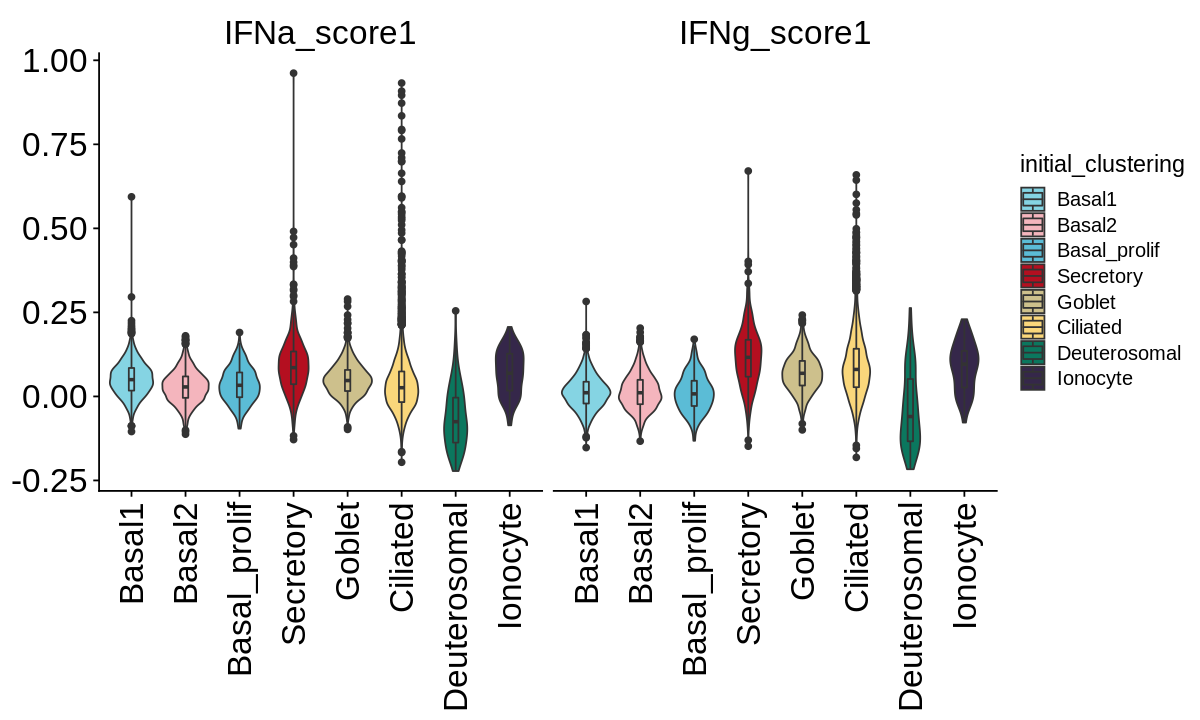

In [10]:
options(repr.plot.width=10, repr.plot.height=6)

ggplot(ifn_score_df, aes(x=initial_clustering, y=score, fill = initial_clustering)) + 
  geom_violin()+

theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+


scale_fill_manual(values = c("#85D4E3", "#F4B5BD",  "#5BBCD6","#B40F20", "#CDC08C", "#FAD77B", "#0B775E", "#35274A", "#F2300F"))+
theme(axis.title.x = element_blank(),
     axis.title.y = element_blank(),
     axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 20),
     axis.text.y = element_text(size = 20))+
theme(strip.background = element_rect(color="white", fill="white", size=1.5, linetype="solid"),
     strip.text.x = element_text(size = 20, family="Arial"))+
facet_wrap(~ifn_type)+ geom_boxplot(width=0.1)

      
setwd('/home/jovyan/data/covid_nasal/figures')
ggsave("basal_ifn_score.png", plot = last_plot(), device = NULL, path = NULL,width = 6, height = 7,  scale = 1)

In [17]:
ifn_score_df_alpha<-dplyr::filter(ifn_score_df, ifn_type == 'IFNa_score1')
ifn_score_df_gamma<-dplyr::filter(ifn_score_df, ifn_type == 'IFNg_score1')

In [26]:
pval_alpha_list<-list()
for (i in unique(ifn_score_df_alpha$initial_clustering)){
    temp<-wilcox.test(ifn_score_df_alpha[ifn_score_df_alpha$initial_clustering == i,]$score,
           ifn_score_df_alpha[ifn_score_df_alpha$initial_clustering != i,]$score, 'greater')$p.value
    names(temp)<-paste0(i, '_pval')
    pval_alpha_list<-append(pval_alpha_list, temp)
    }
    
pval_gamma_list<-list()
for (i in unique(ifn_score_df_gamma$initial_clustering)){
    temp<-wilcox.test(ifn_score_df_gamma[ifn_score_df_alpha$initial_clustering == i,]$score,
           ifn_score_df_gamma[ifn_score_df_alpha$initial_clustering != i,]$score, 'greater')$p.value
    names(temp)<-paste0(i, '_pval')
    pval_gamma_list<-append(pval_gamma_list, temp)
    }


In [28]:
a<-data.frame(matrix(unlist(pval_alpha_list), nrow=length(pval_alpha_list), byrow=TRUE))
a$celltype<-names(pval_alpha_list)
colnames(a)<-c('pval', 'celltype')

df_alpha<-ifn_score_df_alpha %>% group_by(initial_clustering) %>% summarise(median(score))
df_alpha$padj<-p.adjust(a$pval, 'BH')

In [38]:
a<-data.frame(matrix(unlist(pval_gamma_list), nrow=length(pval_gamma_list), byrow=TRUE))
a$celltype<-names(pval_gamma_list)
colnames(a)<-c('pval', 'celltype')

df_gamma<-ifn_score_df_gamma %>% group_by(initial_clustering) %>% summarise(median(score))
df_gamma$padj<-p.adjust(a$pval, 'BH')

In [40]:
ifn_score_df <- covid_US@meta.data %>% dplyr::select(initial_clustering, IFNa_score1, IFNg_score1)

ifn_score_df  <- ifn_score_df %>% filter(!(initial_clustering == 'Basal_prolif'))

ifn_score_df$initial_clustering <- factor(ifn_score_df$initial_clustering, levels = c("Basal1", "Basal2", "Secretory","Goblet",
                                      "Ciliated",                                   
                                      "Deuterosomal",  "Ionocyte"))



***Proportion of covid:non-covid reads***



In [334]:
setwd('/home/jovyan/data/covid_nasal/datasets')
covid<-readRDS("covid_integrated.RDS")

In [357]:
##Create a new identity class based on whether cell is infected
uninfected <- subset(x = covid, 
                     subset = `covid--ORF1ab` == 0 &
                     `covid--S` == 0 &
                     `covid--ORF3a` == 0 &
                     `covid--E` == 0 &
                     `covid--M` == 0 &
                     `covid--ORF6` == 0 &
                     `covid--ORF7a` == 0 &
                     `covid--ORF8` == 0 &
                     `covid--N` == 0 &
                     `covid--ORF10` == 0
                     , slot='counts')

infected_cells<-setdiff(colnames(covid), colnames(uninfected))

Idents(object = covid, cells = Cells(uninfected)) <- 'uninfected'
Idents(object = covid, cells = infected_cells) <- 'infected'

covid[["infection"]] <- Idents(covid)

In [358]:
Idents(covid)<-'Treatment'

covid_S<-subset(covid, id = "Pos")
covid_US<-subset(covid, id = "Neg")

In [359]:
covid_S@meta.data$initial_clustering <- factor(covid_S@meta.data$initial_clustering, 
                                              levels = rev(c("Basal1", "Basal2", "Basal_prolif", "Secretory", "Goblet",
                                                              "Ciliated",
                                                             "Deuterosomal", "Ionocyte")))

In [67]:
Idents(covid_S)<-'infection'
covid_S_infected <- subset(covid_S, id = "infected")

In [68]:
#extract data from Seurat object

data<-GetAssayData(covid_S_infected, slot = "counts")
data<-as.data.frame(data)

In [69]:
#count the number of covid and non-covid transcripts in each cell and express it as a proportions

df<-data.frame(covid_counts = colSums(data[grepl("covid", rownames(data)),]), non_covid_counts = colSums(data[!grepl("covid", rownames(data)),]))
df$initial_clustering<-covid_S_infected@meta.data$initial_clustering

df$covid_prop <- (df$covid_counts/(df$covid_counts+df$non_covid_counts))*100

#reorder the factor for graphing
#df$initial_clustering<-factor(df$initial_clustering, levels = rev(levels(df$initial_clustering)))

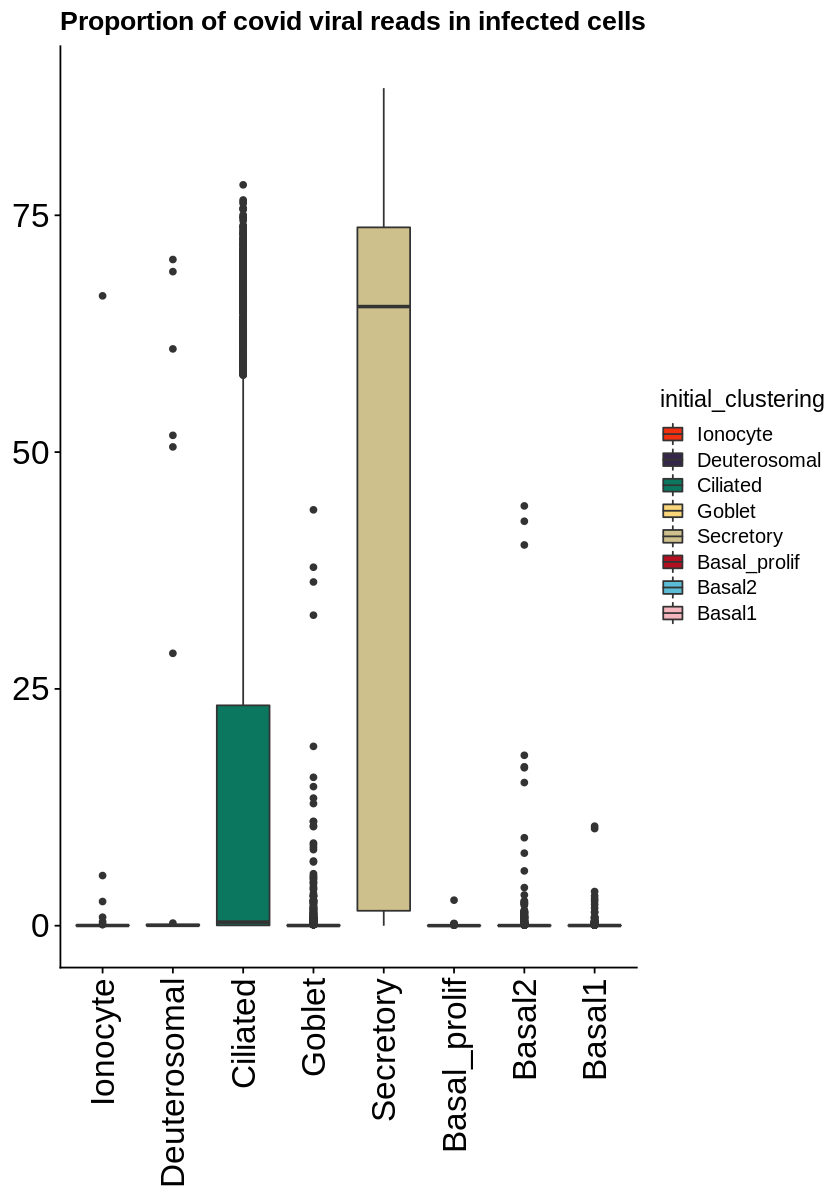

In [70]:
options(repr.plot.width=7, repr.plot.height=10)

ggplot(df, aes(x=initial_clustering, y=covid_prop, fill = initial_clustering)) + 
  geom_boxplot()+

theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
scale_fill_manual(values = rev(c("#85D4E3", "#F4B5BD",  "#5BBCD6","#B40F20", "#CDC08C", "#FAD77B", "#0B775E", "#35274A", "#F2300F")))+
theme(axis.title.x = element_blank(),
     axis.title.y = element_blank(),
     axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 20),
     axis.text.y = element_text(size = 20))+ ggtitle("Proportion of covid viral reads in infected cells") 

setwd('/home/jovyan/data/covid_nasal/figures')
ggsave("proportions_viral_reads_by_celltype.png", plot = last_plot(), device = NULL, path = NULL,width = 5, height = 5,  scale = 1)

In [ ]:
#IFN gene lists from this paper

#Raw data saved as Ziegler_IFN_gene_list_raw.xls

#doi: 10.1016/j.cell.2020.04.035
#PMCID: PMC7252096
#PMID: 32413319
#SARS-CoV-2 Receptor ACE2 Is an Interferon-Stimulated Gene in Human Airway Epithelial Cells and Is Detected in Specific Cell Subsets across Tissues



***Expression of covid entry receptors***



In [2]:
setwd('/home/jovyan/data/covid_nasal/datasets')
covid<-readRDS("covid_integrated.RDS")

In [5]:
Idents(covid)<-'Treatment'

covid_S<-subset(covid, id = "Pos")
covid_US<-subset(covid, id = "Neg")

In [179]:
expr <- FetchData(object = covid_US, vars = c('ACE2', 'TMPRSS2', 'FURIN', 'TMPRSS11D', 'CTSL', 'BSG'))

In [180]:
expr$initial_clustering<-covid_US@meta.data$initial_clustering

In [181]:
props <- list()
totes<-data.frame(condition = character(), Freq = character(), cluster = character(), receptor = character())

for (receptor in c('TMPRSS2', 'FURIN', 'TMPRSS11D', 'CTSL', 'BSG')){
    for(cluster in unique(expr$initial_clustering)){
        test <- expr %>% filter(initial_clustering == cluster) %>% dplyr::select(ACE2, receptor)
        test <- transform(test, c= ifelse((test[[1]]==0 & test[[2]]>0),'ACE_neg_receptor_pos', 'other'))
        test <- transform(test, c= ifelse((test[[1]]>0 & test[[2]]>0), 'ACE_pos_receptor_pos', c))
        test <- transform(test, c= ifelse((test[[1]]==0 & test[[2]]==0), 'ACE_neg_receptor_neg', c))
        test <- transform(test, c= ifelse((test[[1]]>0 & test[[2]]==0), 'ACE_pos_receptor_neg', c))
        
        temp <- as.data.frame(prop.table(table(test$c)))
        temp$cluster<-cluster
        temp$receptor<-receptor
        colnames(temp)<-c('condition', 'Freq', 'cluster', 'receptor')
        totes<-rbind(totes, temp)}
        props[[receptor]]<-totes

}



Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(receptor)` instead of `receptor` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



In [182]:
test<-do.call(rbind.data.frame, props)
test$receptor<-rownames(test)
test<-tidyr::separate(test,
  receptor,
  into = c('receptor', 'spare'),
  sep = "\\.",
  remove = TRUE)
test$spare<-NULL

In [186]:
totes$receptor<-factor(totes$receptor, levels = c('TMPRSS2', 'CTSL', 'FURIN', 'TMPRSS11D', 'BSG'))

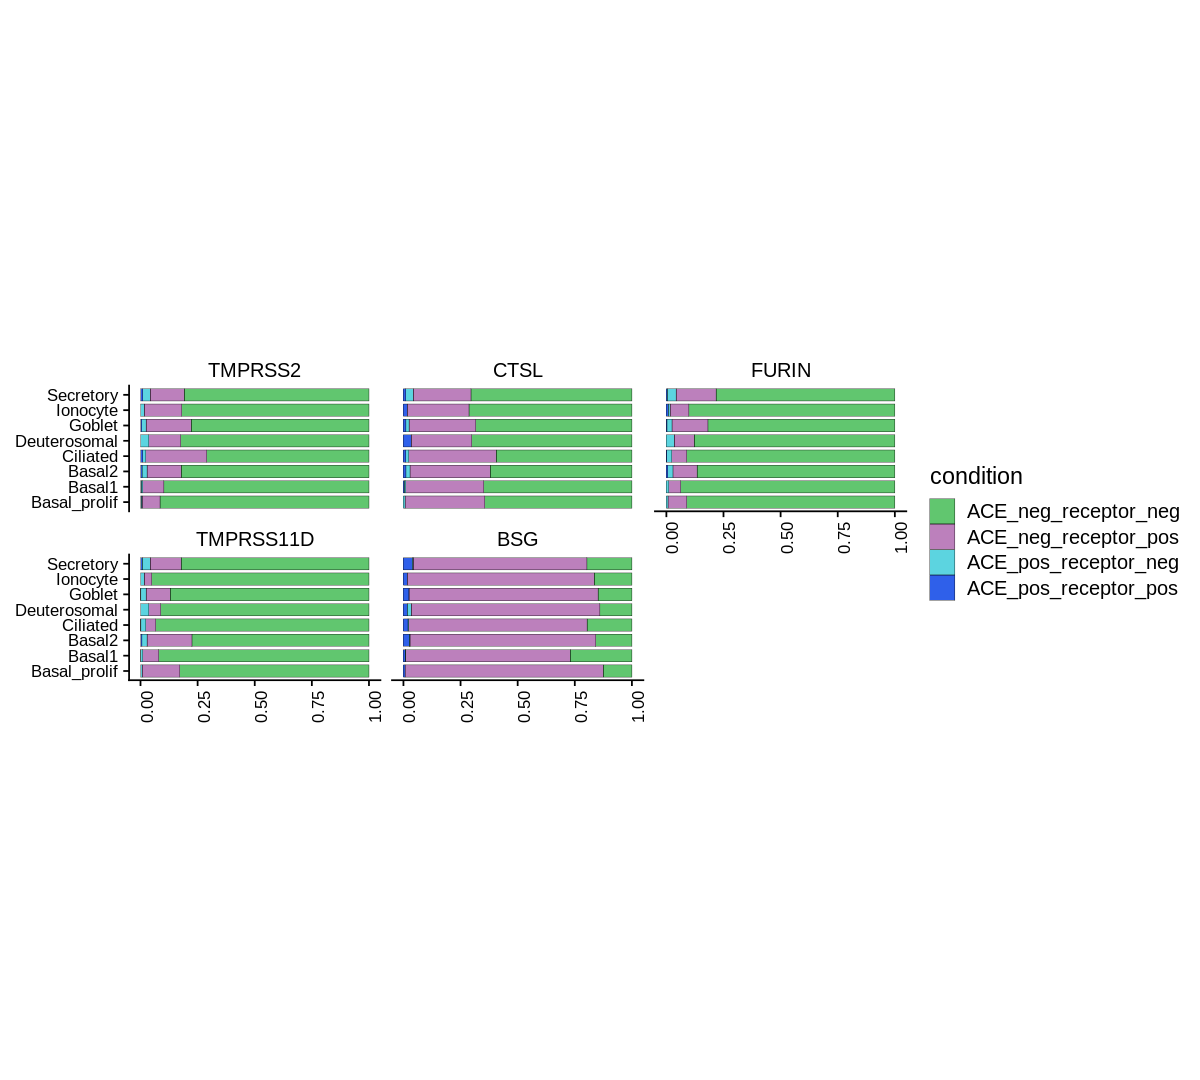

In [199]:
options(repr.plot.width=10, repr.plot.height=9)

ggplot(totes, aes(x=cluster, y = Freq, fill=condition))+ 
    geom_bar(position="fill", stat="identity", size = 0.1, width = 0.8, colour = "black")+
      theme(aspect.ratio = 1/2)+ 
  theme(axis.text.x = element_text(angle = 90, size = 10, family="Arial"),
       axis.text.y = element_text(size = 10, family="Arial"),
       axis.title.x = element_blank(), axis.title.y = element_blank())+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background= element_blank())+
theme(strip.background = element_rect(color="white", fill="white", size=1.5, linetype="solid"),
     strip.text.x = element_text(size = 12, family="Arial"))+
scale_fill_manual(values = c("#61C66F", "#BC80BC", "#5CD4E0", "#2F60EA", "black", "#DBB18A"))+
coord_flip()+
facet_wrap(~receptor)


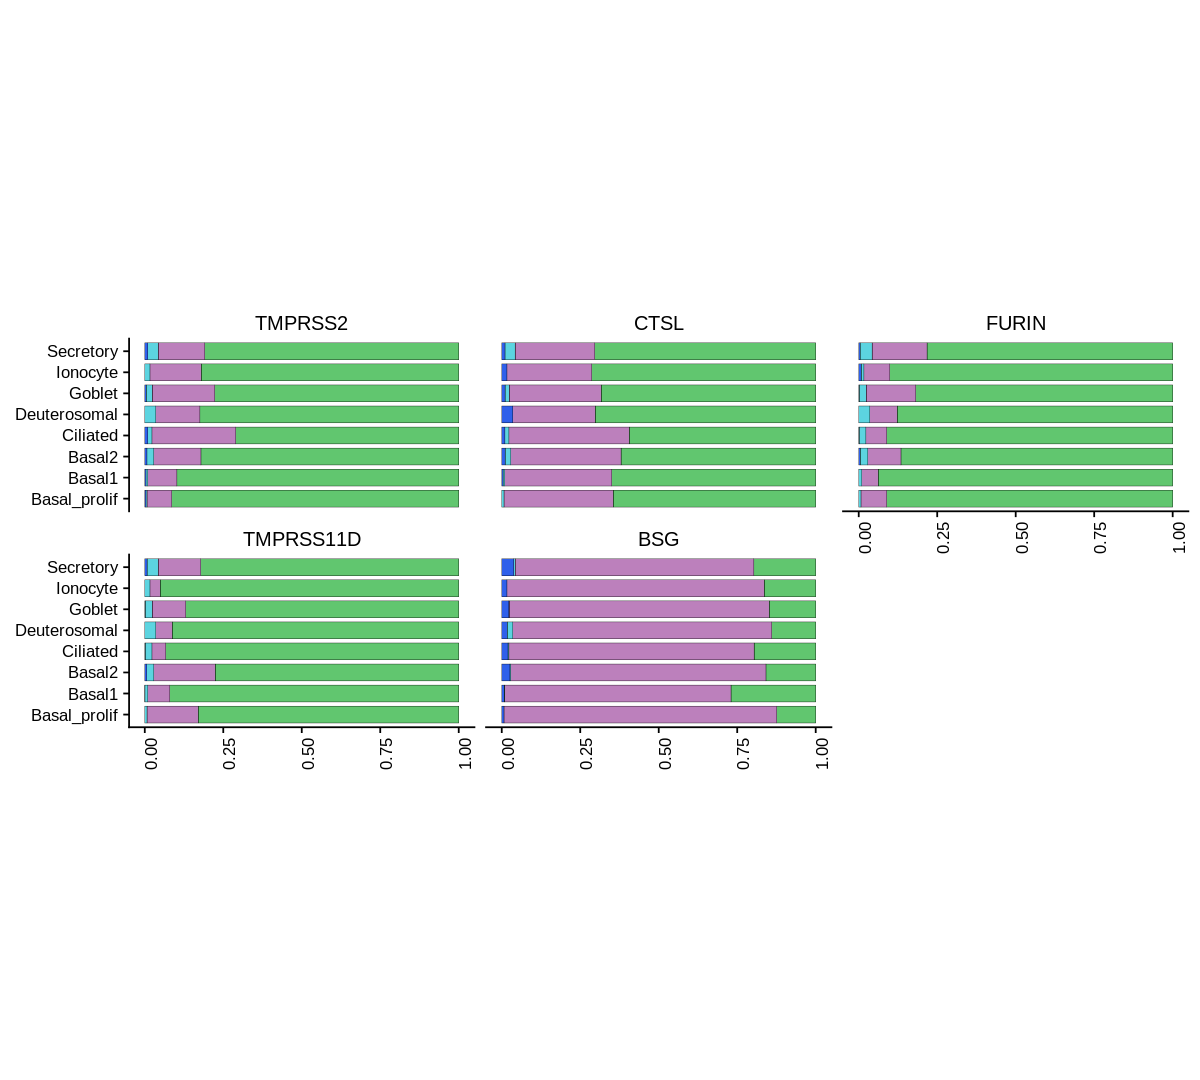

In [200]:
options(repr.plot.width=10, repr.plot.height=9)

ggplot(totes, aes(x=cluster, y = Freq, fill=condition))+ 
    geom_bar(position="fill", stat="identity", size = 0.1, width = 0.8, colour = "black")+
      theme(aspect.ratio = 1/2)+ 
  theme(axis.text.x = element_text(angle = 90, size = 10, family="Arial"),
       axis.text.y = element_text(size = 10, family="Arial"),
       axis.title.x = element_blank(), axis.title.y = element_blank())+
        theme(legend.position = "none")+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background= element_blank())+
theme(strip.background = element_rect(color="white", fill="white", size=1.5, linetype="solid"),
     strip.text.x = element_text(size = 12, family="Arial"))+
scale_fill_manual(values = c("#61C66F", "#BC80BC", "#5CD4E0", "#2F60EA", "black", "#DBB18A"))+
coord_flip()+

facet_wrap(~receptor)

setwd('/home/jovyan/data/covid_nasal/figures')
ggsave("coreceptor_expression.png", plot = last_plot(), device = NULL, path = NULL,width = 10, height = 9,  scale = 1)




***IFN receptor expression***



In [ ]:
setwd('/home/jovyan/data/covid_nasal/datasets')
covid<-readRDS("covid_integrated.RDS")

In [ ]:
options(repr.plot.width=10, repr.plot.height=4)
nasal_markers<-c("covid--ORF1ab", "covid--S", "covid--ORF3a",
                               "covid--E", "covid--M", "covid--ORF6", "covid--ORF7a", "covid--ORF8",
                               "covid--N", "covid--ORF10")

Idents(covid_S)<-"initial_clustering"

DotPlot(covid_S, features = nasal_markers, cols = c("lightgrey", "blue"), col.min = 0.1)+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
theme(axis.title.x = element_blank()) + theme(axis.title.y = element_blank())

setwd('/home/jovyan/data/covid_nasal/figures')
ggsave("infection_dotplot.png", plot = last_plot(), device = NULL, path = NULL,width = 10, height = 4,  scale = 1)

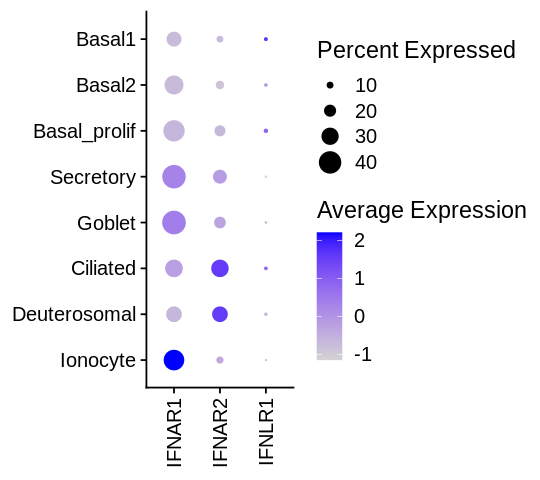

In [241]:
options(repr.plot.width=4.5, repr.plot.height=4)

DotPlot(covid_US, features = c('IFNAR1', 'IFNAR2', 'IFNLR1'))+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
theme(axis.title.x = element_blank()) + theme(axis.title.y = element_blank())

setwd('/home/jovyan/data/covid_nasal/figures')
ggsave("IFN_receptor_expression.png", plot = last_plot(), device = NULL, path = NULL,width = 4.5, height = 4,  scale = 1)



***IFN cytokine expression***



In [22]:
#imported from second workbook

setwd('/home/jovyan/data/covid_nasal/datasets')
covid <- readRDS("covid_integrated.RDS")

In [23]:
covid@meta.data$combined<-paste0(covid@meta.data$initial_clustering, '_', covid@meta.data$Treatment)

In [24]:
Idents(covid)<-'Treatment'

covid_S<-subset(covid, id = "Pos")
covid_US<-subset(covid, id = "Neg")

Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found (10 out of 23 shown): IFNA1, IFNA2, IFNA4, IFNA6, IFNA8, IFNA10, IFNA13, IFNA14, IFNA17, IFNA21”


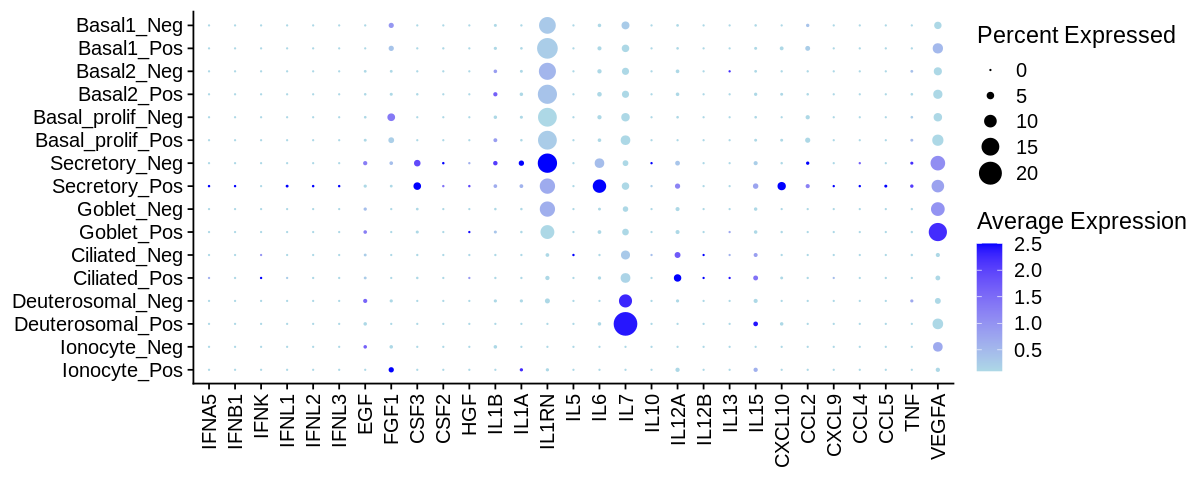

In [26]:
options(repr.plot.width=10, repr.plot.height=4)
ifn_cytokines<-c("IFNA1", "IFNA2", "IFNA4", "IFNA5", "IFNA6", "IFNA8", "IFNA10",
                "IFNA13", "IFNA14", "IFNA17", "IFNA21",
                "IFNB1", "IFNK", "IFNW1", "IFNL1", "IFNL2", "IFNL3", "IFNL4", "EGF", "CCL11", 
                 "FGF1", "CSF3", "CSF2", "HGF", "IFNG", "IL1B", 
                              "IL1A", "IL1RN", "IL2", "IL2RA", "IL3", "IL4", "IL5", "IL6", "IL7", 
                              "IL9", "IL10", "IL12A", "IL12B", "IL13", "IL15", "IL17A", "IL17F", "IL22", 
                              "CXCL10", "CCL2", "CXCL9", "CCL3", "CCL4", "CCL5", "TNF", "VEGFA")


covid@meta.data$combined<-factor(covid@meta.data$combined, 
                                 levels = rev(c('Basal1_Neg', 'Basal1_Pos',
                                           'Basal2_Neg', 'Basal2_Pos',
                                           'Basal_prolif_Neg', 'Basal_prolif_Pos',
                                           'Secretory_Neg', 'Secretory_Pos',
                                           'Goblet_Neg', 'Goblet_Pos',
                                           'Ciliated_Neg', 'Ciliated_Pos',
                                           'Deuterosomal_Neg', 'Deuterosomal_Pos',
                                           'Ionocyte_Neg', 'Ionocyte_Pos')))

Idents(covid)<-"combined"

DotPlot(covid, features = ifn_cytokines, cols = c("lightblue", "blue"), col.min = 0.1)+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
theme(axis.title.x = element_blank()) + theme(axis.title.y = element_blank())

setwd('/home/jovyan/data/covid_nasal/figures')
ggsave("interferon_cytokine_dotplot.png", plot = last_plot(), device = NULL, path = NULL,width = 10, height = 4,  scale = 1)

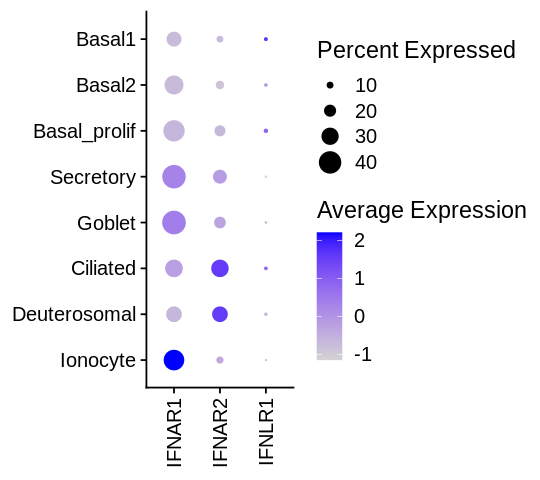

In [241]:
options(repr.plot.width=4.5, repr.plot.height=4)

DotPlot(covid_US, features = c('IFNAR1', 'IFNAR2', 'IFNLR1'))+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
theme(axis.title.x = element_blank()) + theme(axis.title.y = element_blank())

setwd('/home/jovyan/data/covid_nasal/figures')
ggsave("IFN_receptor_expression.png", plot = last_plot(), device = NULL, path = NULL,width = 4.5, height = 4,  scale = 1)



***Volcano plots of untreated vs infected cells***



In [2]:
setwd('/home/jovyan/data/covid_nasal/datasets')
covid<-readRDS("covid_integrated.RDS")

In [3]:
#Import IFNa gene list from Ziegler paper

setwd('/home/jovyan/data/covid_nasal/')
ifna<-read.csv('Ziegler_IFNa_list.csv')

setwd('/home/jovyan/data/covid_nasal/')
ifng<-read.csv('Ziegler_IFNg_list.csv')

#extract only the upregulated genes and make them in to a list
ifna<-ifna %>% filter(Upregulated.in == 'IFNA')
scores_ifna<-list(ifna$Gene)

#extract only the upregulated genes and make them in to a list
ifng<-ifng %>% filter(Upregulated.in == 'IFNG')
scores_ifng<-list(ifng$Gene)

In [4]:
##Create a new identity class based on whether cell is infected
uninfected <- subset(x = covid, 
                     subset = `covid--ORF1ab` == 0 &
                     `covid--S` == 0 &
                     `covid--ORF3a` == 0 &
                     `covid--E` == 0 &
                     `covid--M` == 0 &
                     `covid--ORF6` == 0 &
                     `covid--ORF7a` == 0 &
                     `covid--ORF8` == 0 &
                     `covid--N` == 0 &
                     `covid--ORF10` == 0
                     , slot='counts')

infected_cells<-setdiff(colnames(covid), colnames(uninfected))

Idents(object = covid, cells = Cells(uninfected)) <- 'uninfected'
Idents(object = covid, cells = infected_cells) <- 'infected'

covid[["infection"]] <- Idents(covid)

In [5]:
covid@meta.data$combined<-paste0(covid@meta.data$Treatment, '_', covid@meta.data$infection)


***Generate DEGs***


In [ ]:
#Compare untreated with infected

In [19]:
Idents(covid)<-'combined'
covid_compare<-subset(covid, id = c('Neg_uninfected', 'Pos_infected'))

In [20]:
covid_compare@meta.data$initial_clustering <- factor(covid_compare@meta.data$initial_clustering, 
                                              levels = rev(c("Basal1", "Basal2", "Basal_prolif", "Secretory", "Goblet",
                                                              "Ciliated",
                                                             "Deuterosomal", "Ionocyte")))

In [21]:
stats<-data.frame(p_val = character(), avg_log2FC = character(), pct.1 = character(), pct.2 = character(), 
                  p_val_adj = character(), cluster = character(), gene = character(), celltype = character())


for (i in unique(covid_compare@meta.data$initial_clustering)){
     Idents(covid_compare)<-'initial_clustering'
     test<-subset(covid_compare, id = i)
     Idents(test)<-'combined'
     stats_temp<-FindMarkers(test, ident.1 = 'Pos_infected', min.pct = 0.25, logfc.threshold = 0.25, only.pos = FALSE)
     stats_temp$celltype<-paste0(i, '_infected')
     stats_temp$gene<-rownames(stats_temp)
     stats<-rbind(stats, stats_temp)
    }

In [22]:
setwd('/home/jovyan/data/covid_nasal/stats')
write.csv(stats, 'DEGs_untreated_vs_infected_by_celltype.csv')

In [ ]:
#Compare untreated with bystander

In [23]:
Idents(covid)<-'combined'
covid_compare<-subset(covid, id = c('Neg_uninfected', 'Pos_uninfected'))

In [24]:
covid_compare@meta.data$initial_clustering <- factor(covid_compare@meta.data$initial_clustering, 
                                              levels = rev(c("Basal1", "Basal2", "Basal_prolif", "Secretory", "Goblet",
                                                              "Ciliated",
                                                             "Deuterosomal", "Ionocyte")))

In [25]:
stats<-data.frame(p_val = character(), avg_log2FC = character(), pct.1 = character(), pct.2 = character(), 
                  p_val_adj = character(), cluster = character(), gene = character(), celltype = character())


for (i in unique(covid_compare@meta.data$initial_clustering)){
     Idents(covid_compare)<-'initial_clustering'
     test<-subset(covid_compare, id = i)
     Idents(test)<-'combined'
     stats_temp<-FindMarkers(test, ident.1 = 'Pos_uninfected', min.pct = 0.25, logfc.threshold = 0.25, only.pos = FALSE)
     stats_temp$celltype<-paste0(i, '_bystander')
     stats_temp$gene<-rownames(stats_temp)
     stats<-rbind(stats, stats_temp)
    }

In [26]:
setwd('/home/jovyan/data/covid_nasal/stats')
write.csv(stats, 'DEGs_untreated_vs_bystander_by_celltype.csv')

In [16]:
test<-AverageExpression(covid_compare)


**Restart with calculated DEGs***


In [4]:
#Restart
setwd('/home/jovyan/data/covid_nasal/stats')
stats_infected<-read.csv('DEGs_untreated_vs_infected_by_celltype.csv', row.names = 1)
stats_bystander<-read.csv('DEGs_untreated_vs_bystander_by_celltype.csv', row.names = 1)

In [5]:
stats<-rbind(stats_infected, stats_bystander)

In [158]:
#setwd('/home/jovyan/data/covid_nasal/stats')
#write.csv(stats, 'interferome_uninfected_vs_all.csv')

In [28]:
#export all genes, put them in to interferome.com and extract list of predicted ISGs in respiratory epithelium

interferome_genes<-c("ADAM28", 	"ADAR", 	"ADM", 	"ALDH3B2", 	"AQP3", 	"BLNK", 	"BST2", 	"C1R", 	"C1S", 	"CALML3", 	"CASP4", 	"CCNA1", 	"CCND3", 	"CCNDBP1", 	"CD164", 	"CFB", 	"CFB", 	"CFB", 	"CFH", 	"CFHR1", 	"CFLAR", 	"CHMP5", 	"CLIC3", 	"CRABP2", 	"CTC-479C5.12", 	"CXCL14", 	"CYP2J2", 	"DSC2", 	"EIF2AK2", 	"EIF3F", 	"EPS8L1", 	"EPS8L1", 	"ERAP2", 	"ERBB3", 	"FKBP5", 	"GPNMB", 	"HIST1H1E", 	"HLA-A", 	"HLA-B", 	"HLA-B", 	"HLA-B", 	"HLA-B", 	"HLA-C", 	"HLA-C", 	"HLA-C", 	"HLA-C", 	"HLA-C", 	"HLA-C", 	"HLA-C", 	"HLA-E", 	"HLA-F", 	"HLA-F", 	"HNRNPM", 	"HS3ST1", 	"ID1", 	"IFI16", 	"IFI27", 	"IFI6", 	"IFIT1", 	"IFIT3", 	"IFITM1", 	"IFITM2", 	"IFITM3", 	"IL33", 	"IRF1", 	"IRF2", 	"IRF7", 	"IRF9", 	"ISG15", 	"ISG20", 	"ITGB6", 	"JAG1", 	"KIAA0100", 	"KLF4", 	"KRT13", 	"KRT16", 	"KRT23", 	"LAP3", 	"LGALS3BP", 	"LGALS9", 	"LGALS9C", 	"LGMN", 	"LY6D", 	"LY6E", 	"MCL1", 	"MMP14", 	"MSRB1", 	"MX1", 	"MX2", 	"MYCBP2", 	"MYO10", 	"NAPA", 	"NUPR1", 	"OAS1", 	"OAS2", 	"PARP14", 	"PARP4", 	"PARP4P2", 	"PARVA", 	"PCGF5", 	"PLSCR1", 	"PMAIP1", 	"PNPT1", 	"PPL", 	"PSMB10", 	"PSMB8", 	"PSMB9", 	"PSMB9", 	"PSME1", 	"PSME2", 	"PSME2P2", 	"PTGFR", 	"RBCK1", 	"RNF114", 	"RNF213", 	"RP11-468E2.4", 	"RPL14", 	"RPL27A", 	"RRAD", 	"RRBP1", 	"SAMHD1", 	"SCARB2", 	"SERPINB1", 	"SERPINB3", 	"SERPINB4", 	"SLC6A14", 	"SLC6A14", 	"SLFN5", 	"SNRNP200", 	"SOX4", 	"SP100", 	"SPRR3", 	"STAT1", 	"SULT2B1", 	"TAP1", 	"TCF4", 	"THBS1", 	"TMED2", 	"TMEM62", 	"TMPRSS11E", 	"TMPRSS4", 	"TNFSF10", 	"TNFSF12-TNFSF13", 	"TNFSF13", 	"TRAF4", 	"TRANK1", 	"TRIM22", 	"TRIM25", 	"TXNIP", 	"TXNIP", 	"TYMP", 	"UBE2L6", 	"WARS", 	"XAF1", 	"ZC3HAV1")

In [29]:
#prepare data

#sign correct the fold change (so down in negative)
stats$log2FC_sign_corrected<-stats$avg_log2FC

###label genes of interest in threshold column
#firstly by those that are significant (i.e. fold change > 1.5 and adjusted p value <0.05)
stats$sig_genes<-ifelse(stats$p_val_adj<0.05 & abs(stats$avg_log2FC) > 0.585, 'sig', 'not_sig')

#make extra columns including genes if they are both signficant AND fulfil extra condition (e.g. listed as ISG)
stats$covid_genes<-ifelse(grepl('covid', stats$gene) & stats$sig_genes == 'sig', stats$gene, '')

stats$ISG_genes<-ifelse(stats$gene %in% ifna$Gene & stats$sig_genes == 'sig', stats$gene, '')
stats$interferome_genes<-ifelse(stats$gene %in% interferome_genes & stats$sig_genes == 'sig', stats$gene, '')

stats$both<-ifelse(stats$interferome_genes == stats$ISG_genes & stats$sig_genes == 'sig', stats$ISG_genes, '')
stats$ISG_genes_modified<-ifelse(stats$ISG_genes == stats$both & stats$sig_genes == 'sig', '', stats$ISG_gene)
stats$interferome_genes_modified<-ifelse(stats$interferome_genes == stats$both & stats$sig_genes == 'sig', '', stats$interferome_genes)


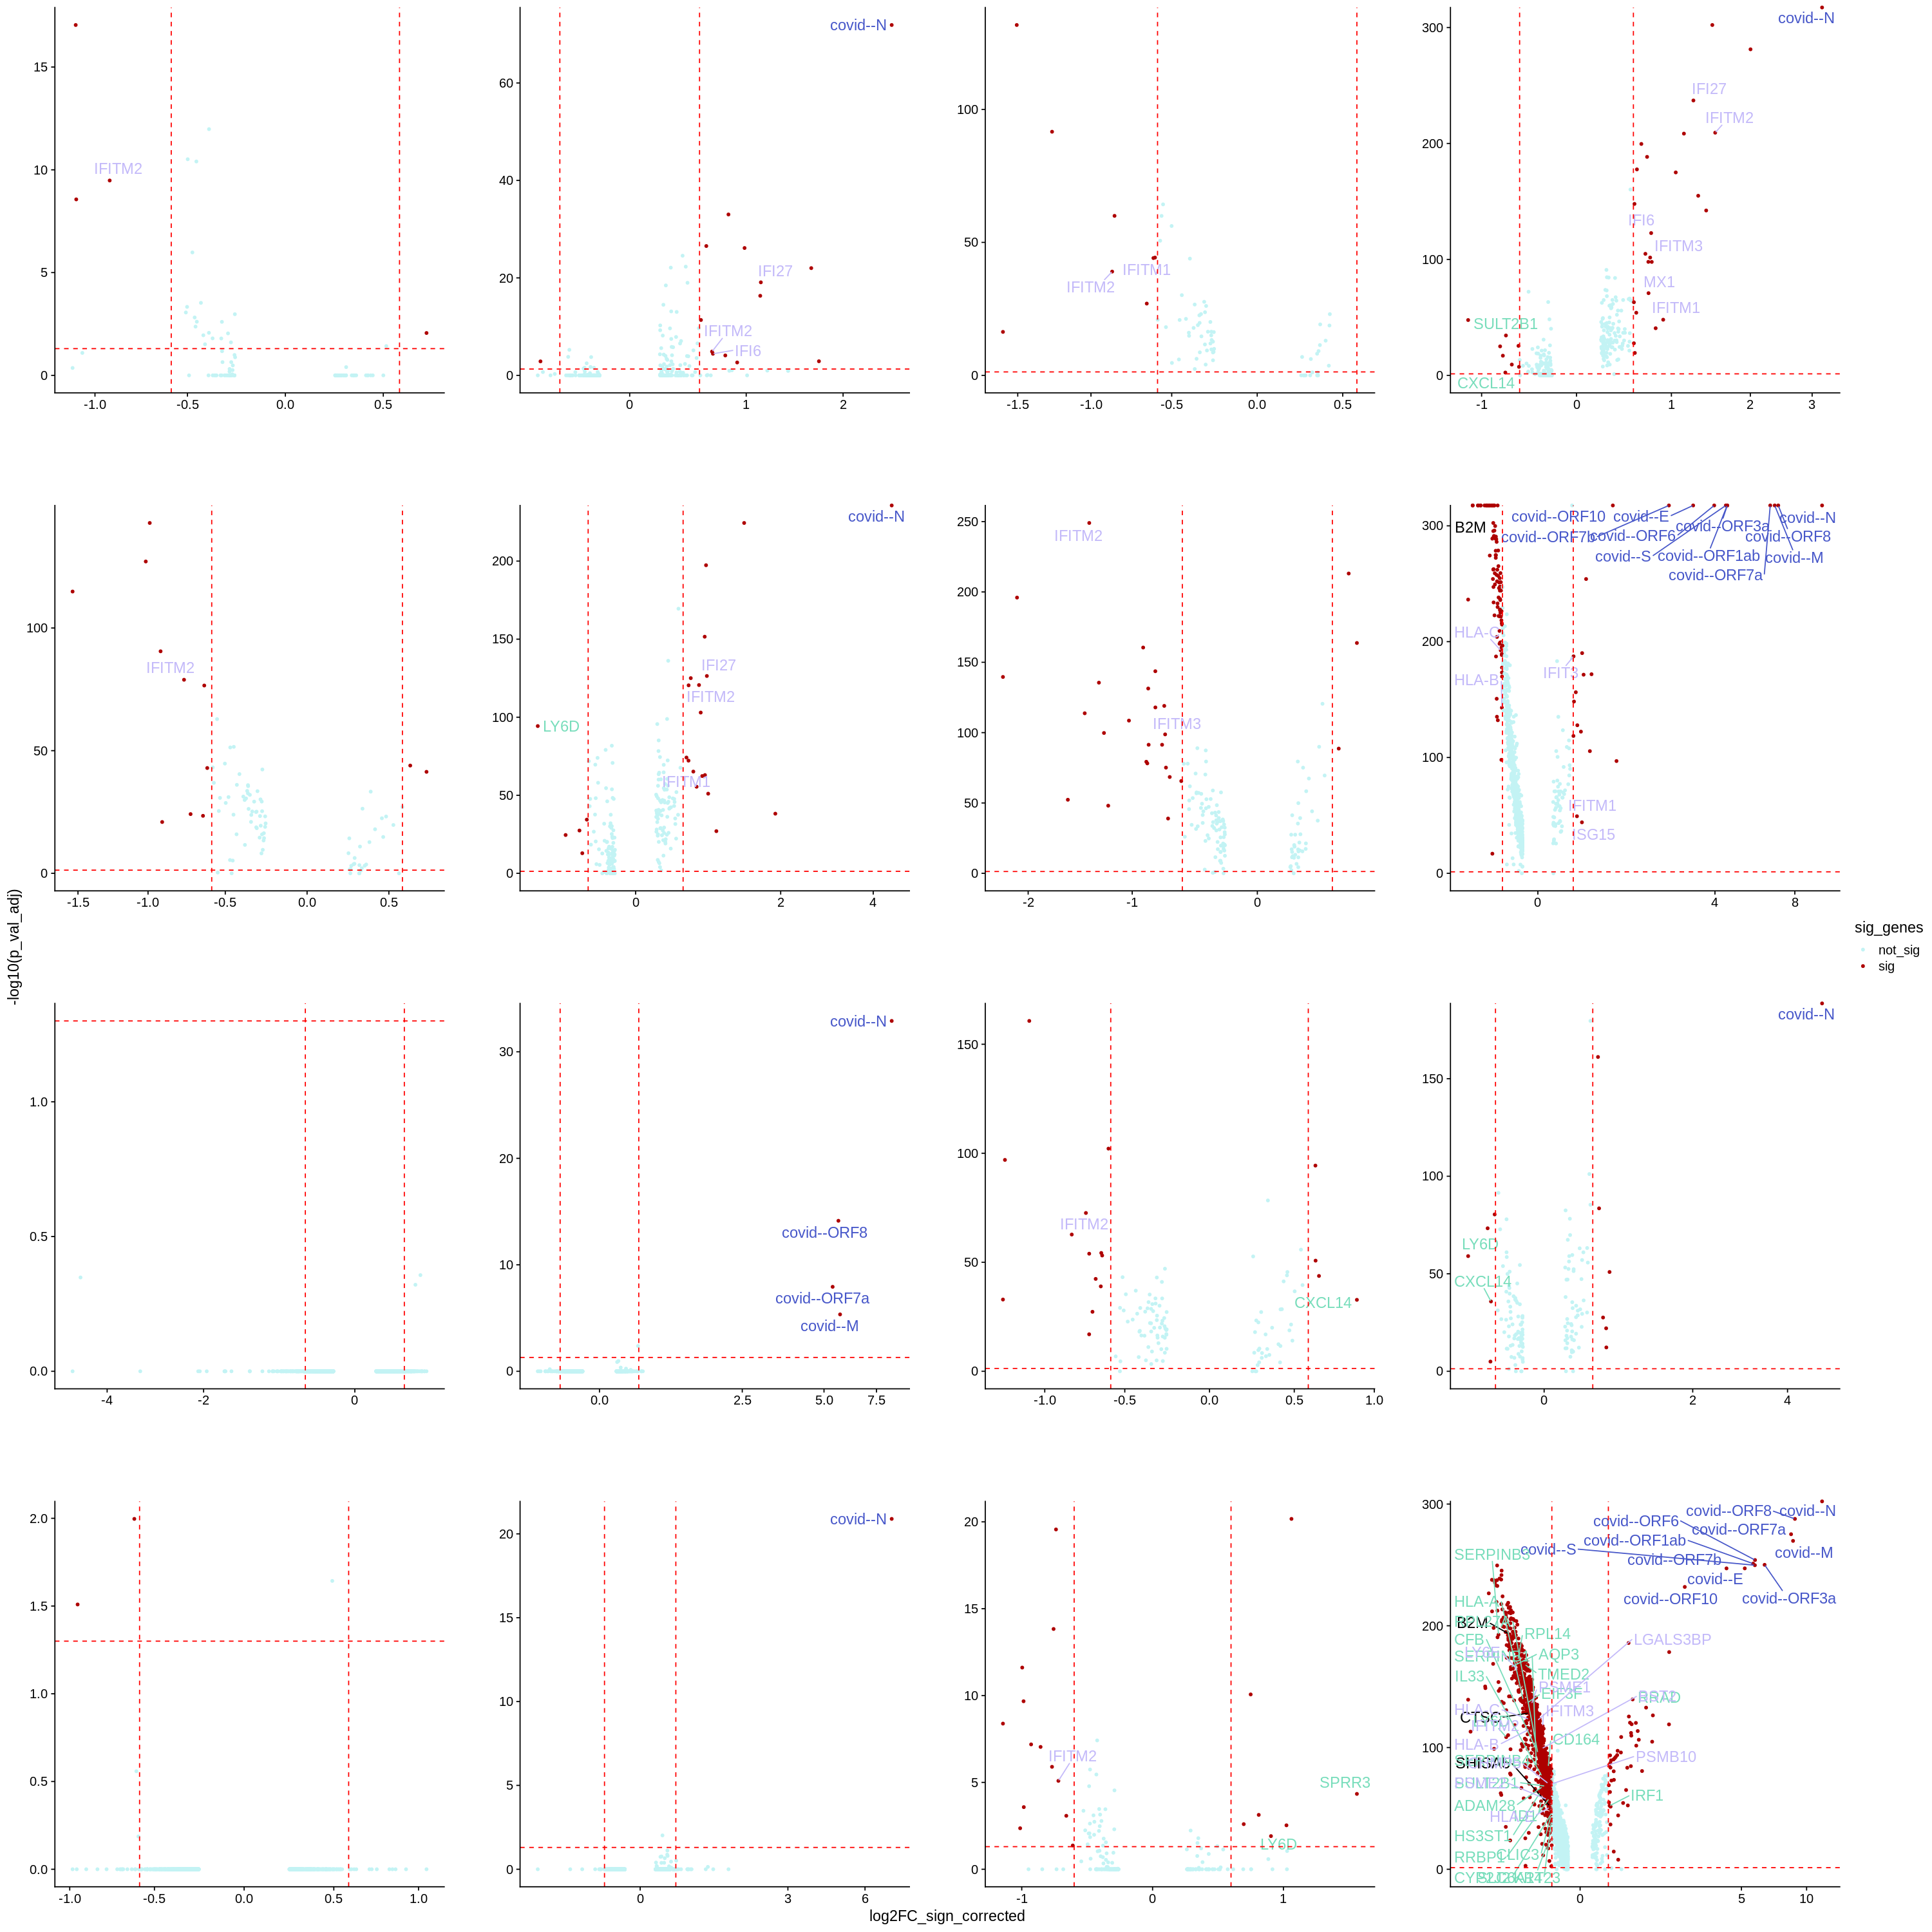

In [161]:
#label Zielger and interferome genes

options(repr.plot.width=25, repr.plot.height=25)
options(ggrepel.max.overlaps = Inf)

ggplot(stats) +
        geom_point(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), colour=sig_genes), size = 1)+
scale_color_manual(values=c('#C3F3F4', "#ae0000"))+
geom_text_repel(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), 
                    label = ISG_genes_modified), size = 5, force = 20, color = 'black')+
geom_text_repel(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), 
                    label = covid_genes), size = 5, force = 20, color = '#4757C9')+
geom_text_repel(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), 
                    label = interferome_genes_modified), size = 5, force = 20, color = '#78DDBB')+
geom_text_repel(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), 
                    label = both), size = 5, force = 20, color = '#C3B9F9')+

#fold change of 1.5: 2^x = 1.5 --> x (ln 2) = ln(1.5) --> x=0.584
geom_vline(xintercept = -0.585, linetype = "dashed", color = "red", size = 0.5)+

geom_vline(xintercept = 0.585, linetype = "dashed", color = "red", size = 0.5)+

#p val adjusted: -log10(0.05) = 1.3
geom_hline(yintercept = 1.30, linetype = "dashed", color = "red", size = 0.5)+
theme(panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(), 
      panel.background = element_blank(),
      axis.line = element_line(colour = "black"),
      strip.text.x = element_blank(),
      strip.background = element_blank(),
        panel.spacing.x = unit(3, "lines"),
     panel.spacing.y = unit(6, "lines"))+
#scale_y_continuous(trans=scales::pseudo_log_trans(base = 10))+
scale_x_continuous(trans=scales::pseudo_log_trans(base = 10))+

facet_wrap(~celltype, ncol = 4, scales = "free")+
  coord_cartesian(clip = "off")

In [12]:
#Label Ziegler ISG genes only
setwd('/home/jovyan/data/covid_nasal/stats')
stats_infected<-read.csv('DEGs_untreated_vs_infected_by_celltype.csv', row.names = 1)
stats_bystander<-read.csv('DEGs_untreated_vs_bystander_by_celltype.csv', row.names = 1)

In [13]:
stats<-rbind(stats_infected, stats_bystander)

In [14]:
#Import IFNa gene list from Ziegler paper

setwd('/home/jovyan/data/covid_nasal/')
ifna<-read.csv('Ziegler_IFNa_list.csv')


In [15]:
#prepare data

#sign correct the fold change (so down in negative)
stats$log2FC_sign_corrected<-stats$avg_log2FC

###label genes of interest in threshold column
#firstly by those that are significant (i.e. fold change > 1.5 and adjusted p value <0.05)
stats$sig_genes<-ifelse(stats$p_val_adj<0.05 & abs(stats$avg_log2FC) > 0.585, 'sig', 'not_sig')

#make extra columns including genes if they are both signficant AND fulfil extra condition (e.g. listed as ISG)
stats$covid_genes<-ifelse(grepl('covid', stats$gene) & stats$sig_genes == 'sig', stats$gene, '')
stats$covid_genes<-gsub("covid--", "", stats$covid_genes)

stats$ISG_genes<-ifelse(stats$gene %in% ifna$Gene & stats$sig_genes == 'sig', stats$gene, '')


In [16]:
unique(stats$celltype)

[1] "Secretory_infected"     "Ciliated_infected"      "Basal2_infected"       
 [4] "Basal1_infected"        "Goblet_infected"        "Basal_prolif_infected" 
 [7] "Deuterosomal_infected"  "Ionocyte_infected"      "Secretory_bystander"   
[10] "Ciliated_bystander"     "Basal2_bystander"       "Basal1_bystander"      
[13] "Goblet_bystander"       "Basal_prolif_bystander" "Deuterosomal_bystander"
[16] "Ionocyte_bystander"

In [17]:
stats$celltype <- factor(stats$celltype, 
                                              levels = c("Basal1_bystander", "Basal1_infected",
                                                             "Basal2_bystander", "Basal2_infected", 
                                                             "Basal_prolif_bystander",  "Basal_prolif_infected", 
                                                             "Secretory_bystander", "Secretory_infected", 
                                                             "Goblet_bystander", "Goblet_infected",
                                                             "Ciliated_bystander", "Ciliated_infected",
                                                             "Deuterosomal_bystander", "Deuterosomal_infected",
                                                             "Ionocyte_bystander", "Ionocyte_infected"))

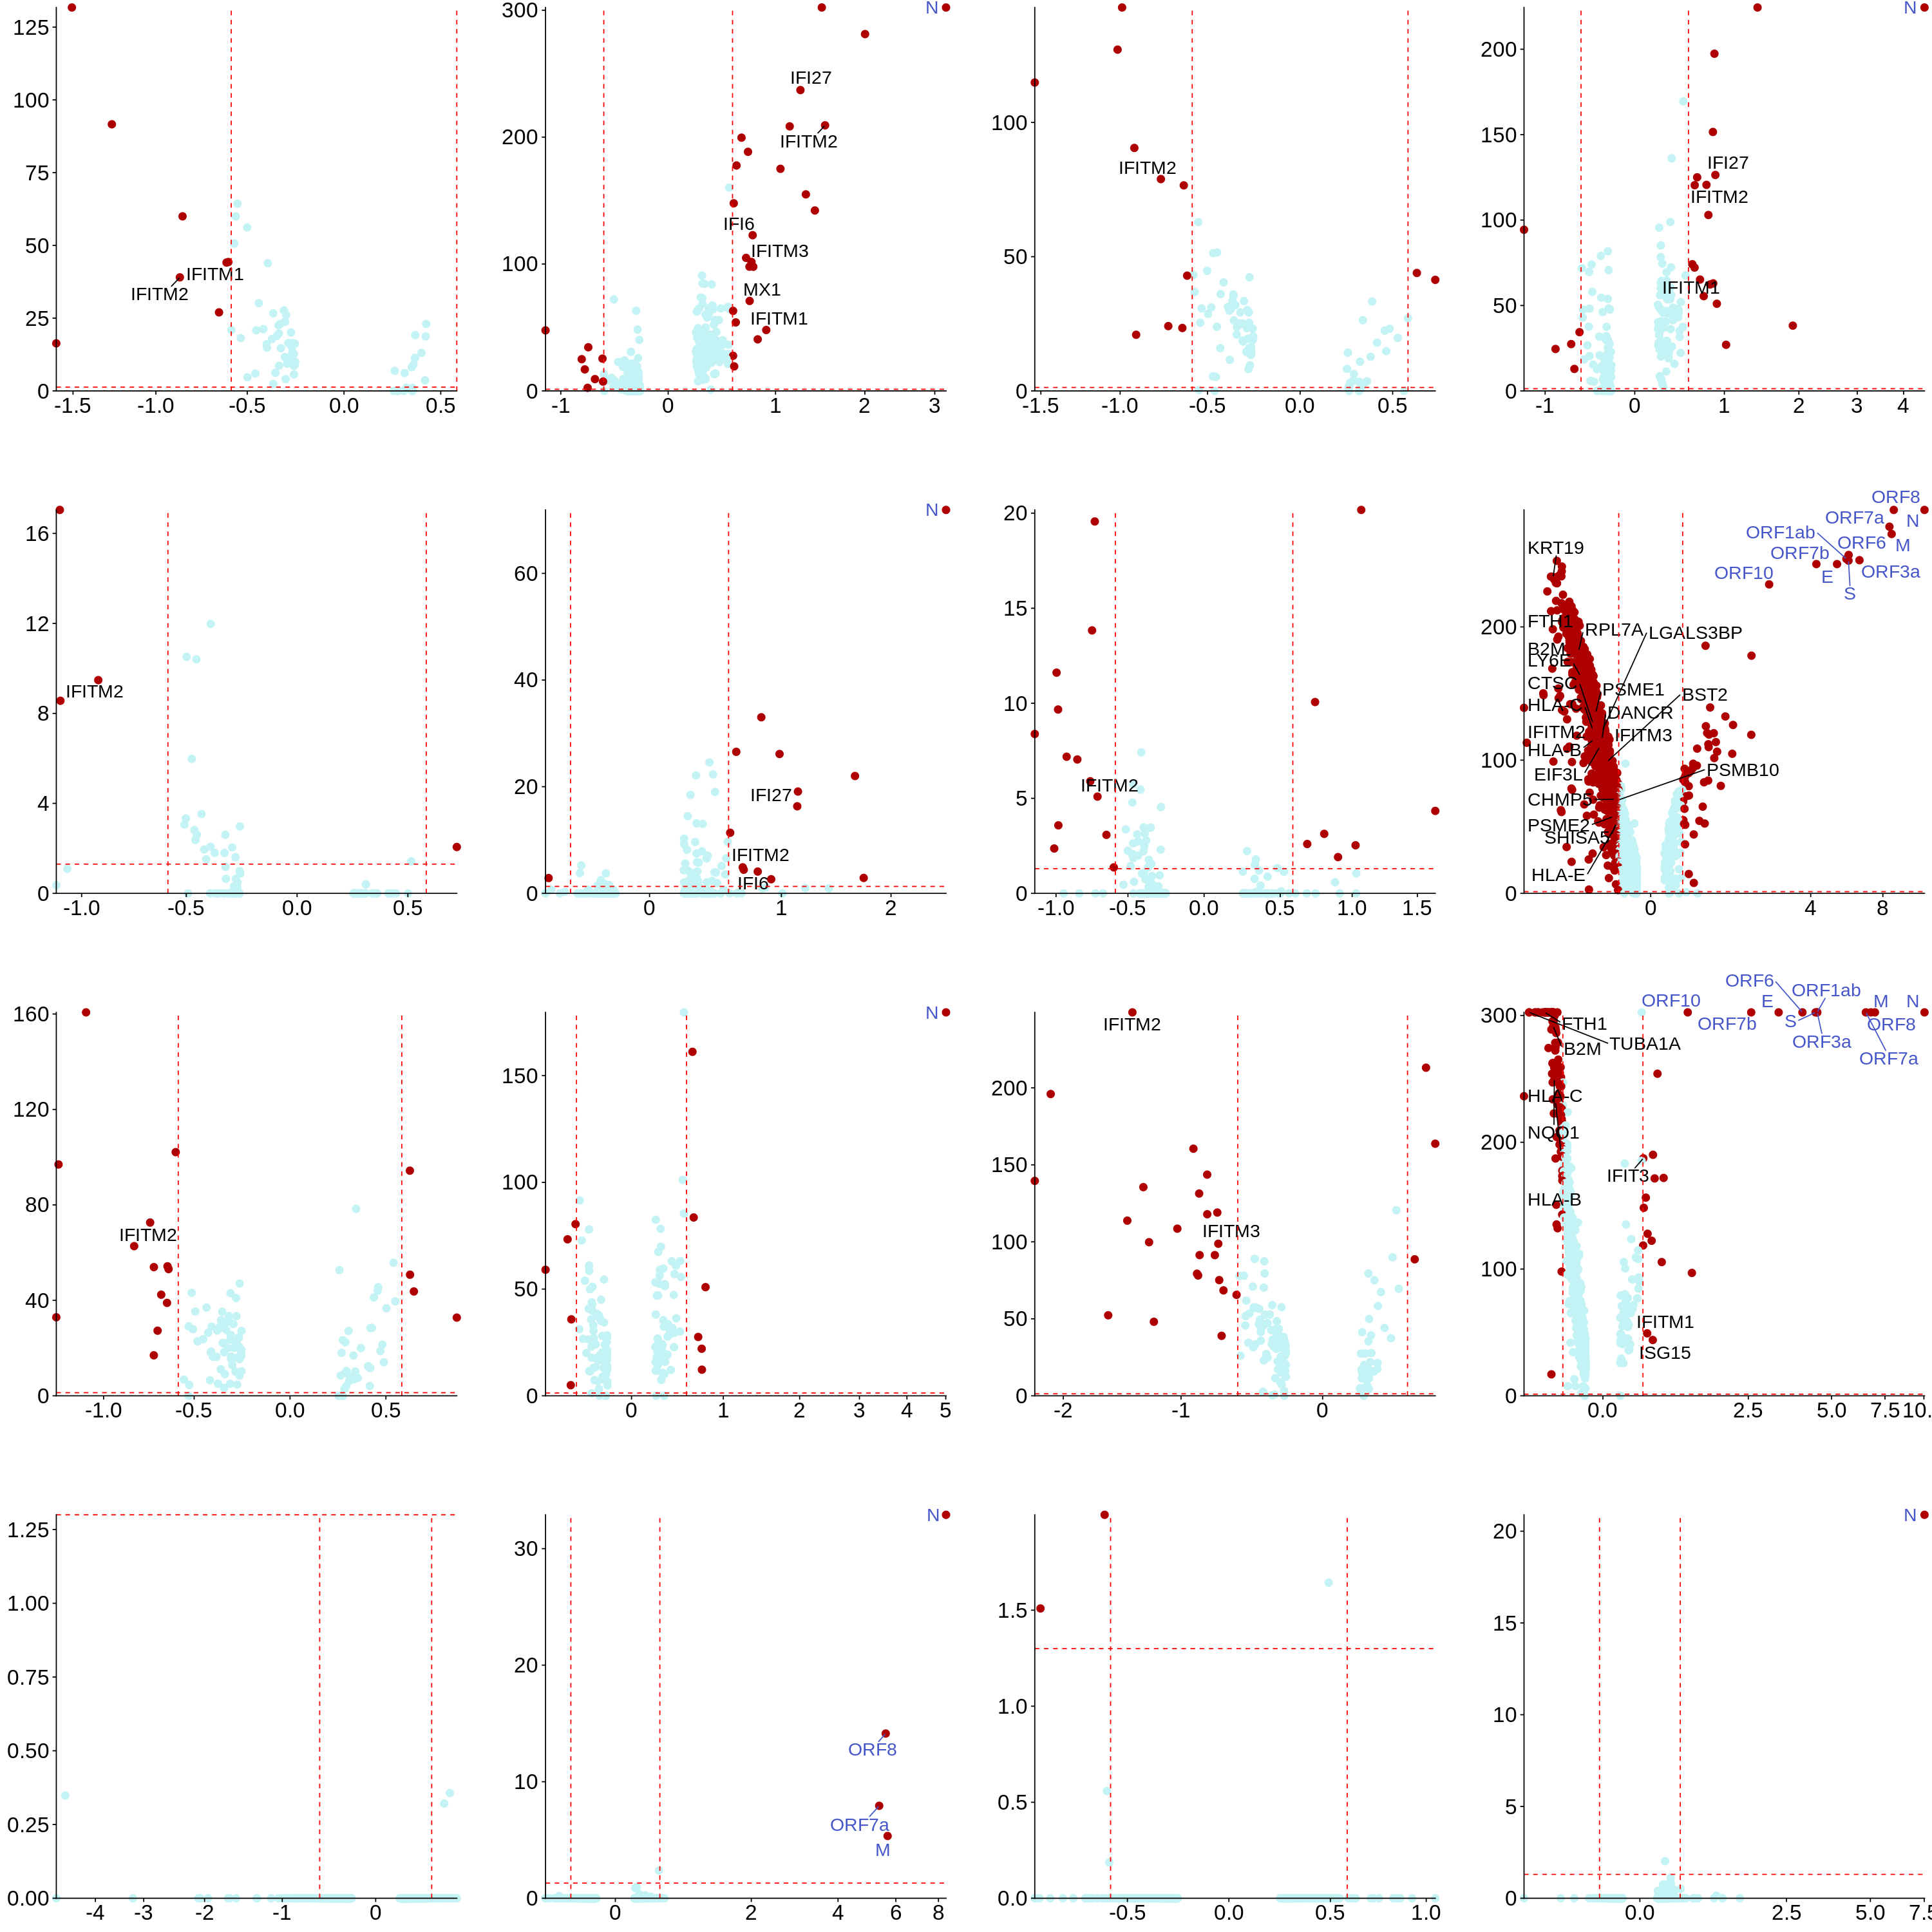

In [20]:
#label Zielger and interferome genes

options(repr.plot.width=25, repr.plot.height=25)
options(ggrepel.max.overlaps = Inf)

ggplot(stats) +
        geom_point(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), colour=sig_genes), size = 3)+
scale_color_manual(values=c('#C3F3F4', "#ae0000"))+
geom_text_repel(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), 
                    label = ISG_genes), size = 6, force = 20, color = 'black', family = "Helvetica")+
geom_text_repel(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), 
                    label = covid_genes), size = 6, force = 20, color = '#4757C9', ylim = c(0,400), seed = 10, family="Helvetica")+

#fold change of 1.5: 2^x = 1.5 --> x (ln 2) = ln(1.5) --> x=0.584
geom_vline(xintercept = -0.585, linetype = "dashed", color = "red", size = 0.5)+

geom_vline(xintercept = 0.585, linetype = "dashed", color = "red", size = 0.5)+

#p val adjusted: -log10(0.05) = 1.3
geom_hline(yintercept = 1.30, linetype = "dashed", color = "red", size = 0.5)+

theme(panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(), 
      panel.background = element_blank(),
      axis.line = element_line(colour = "black"),
      axis.text = element_text(size =20),
      axis.title = element_blank(),
      strip.text.x = element_blank(),
      strip.background = element_blank(),
        panel.spacing.x = unit(3, "lines"),
     panel.spacing.y = unit(6, "lines"),
     legend.position = 'none',
     text=element_text(family="Helvetica"))+

scale_y_continuous(expand = c(0, 0))+
scale_x_continuous(trans=scales::pseudo_log_trans(base = 10), expand = c(0, 0))+

facet_wrap(~celltype, ncol = 4, scales = "free")+
  coord_cartesian(clip = "off")

setwd('/home/jovyan/data/covid_nasal/figures')
ggsave("volcano_plot_ziegler_ISGs_unlabelled.png", plot = last_plot(), device = NULL, path = NULL,width = 25, 
      height = 25,  scale = 1)

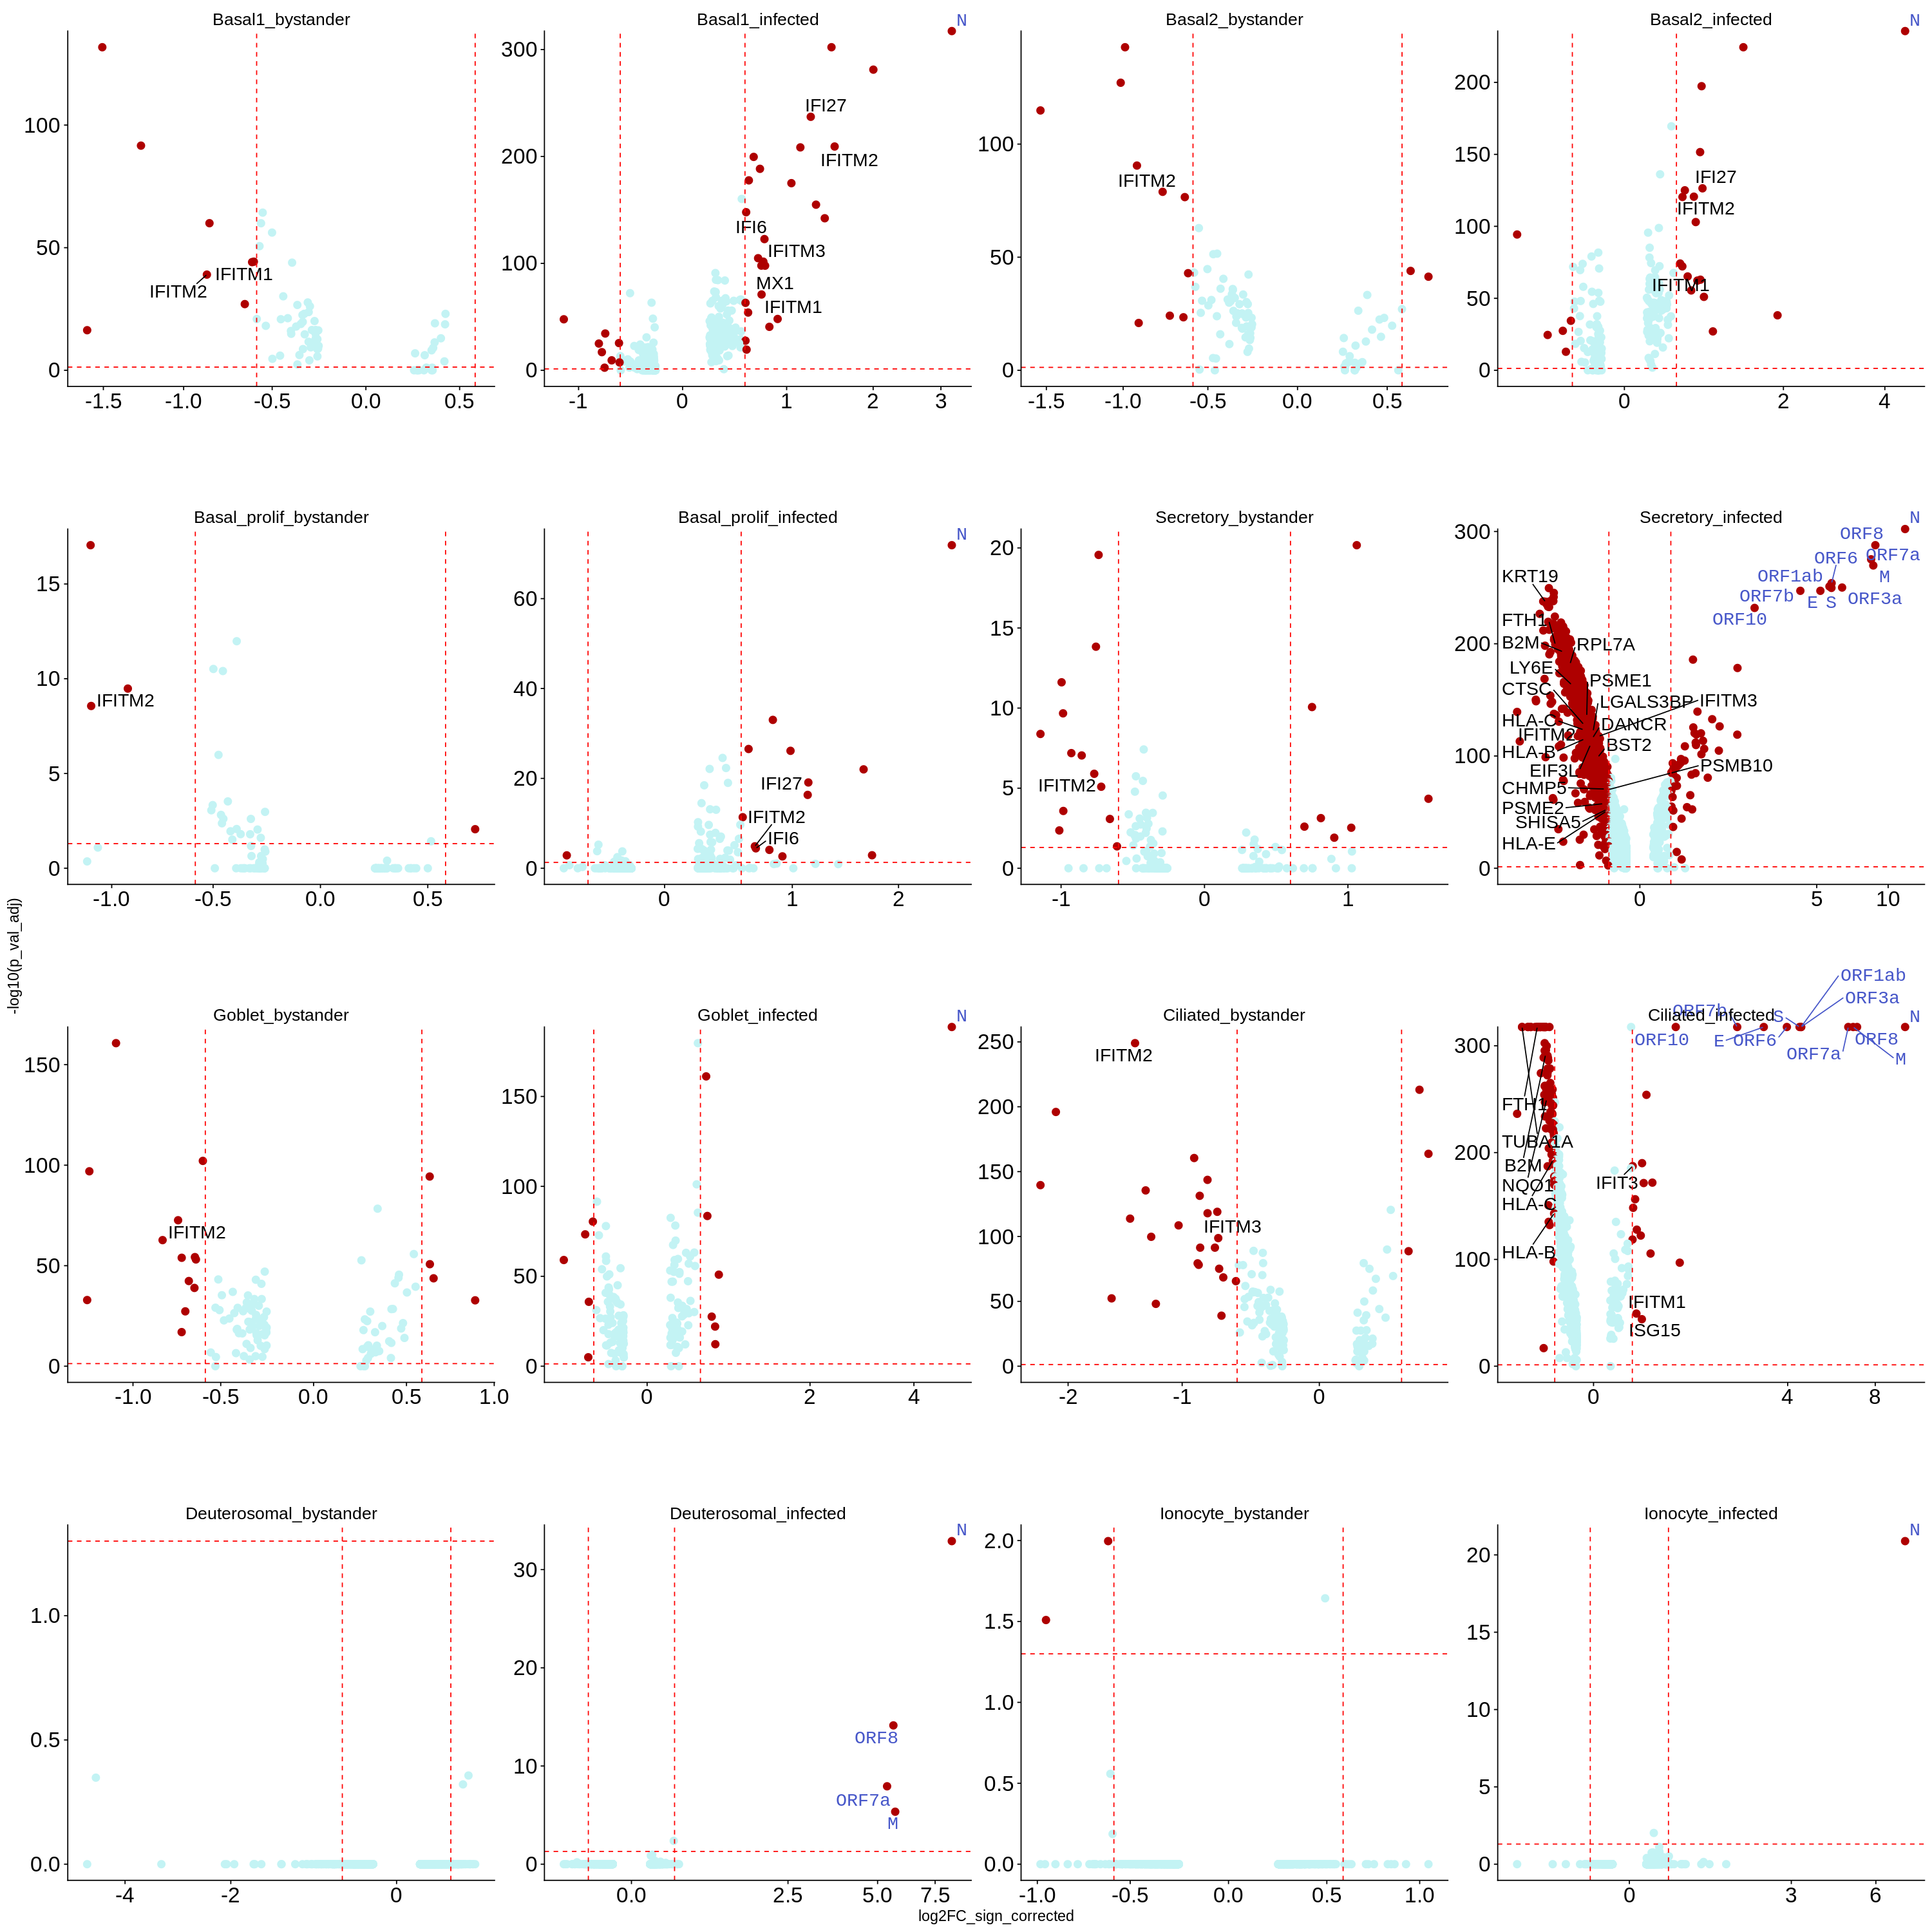

In [17]:
#replot with labels

options(repr.plot.width=25, repr.plot.height=25)
options(ggrepel.max.overlaps = Inf)

ggplot(stats) +
        geom_point(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), colour=sig_genes), size = 3)+
scale_color_manual(values=c('#C3F3F4', "#ae0000"))+
geom_text_repel(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), 
                    label = ISG_genes), size = 6, force = 20, color = 'black', family = "Helvetica")+
geom_text_repel(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), 
                    label = covid_genes), size = 6, force = 20, color = '#4757C9', 
                ylim = c(0,400), seed = 10, family="Helvetica")+

#fold change of 1.5: 2^x = 1.5 --> x (ln 2) = ln(1.5) --> x=0.584
geom_vline(xintercept = -0.585, linetype = "dashed", color = "red", size = 0.5)+

geom_vline(xintercept = 0.585, linetype = "dashed", color = "red", size = 0.5)+

#p val adjusted: -log10(0.05) = 1.3
geom_hline(yintercept = 1.30, linetype = "dashed", color = "red", size = 0.5)+
theme(panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(), 
      panel.background = element_blank(),
      axis.line = element_line(colour = "black"),
      axis.text = element_text(size =20),
  
      strip.text.x = element_text(size = 16, color = "black"),
      strip.background = element_blank(),
        panel.spacing.y = unit(6, "lines"),
     legend.position = 'none',
     text=element_text(family="Helvetica")+
#scale_y_continuous(trans=scales::pseudo_log_trans(base = 10))+
scale_x_continuous(trans=scales::pseudo_log_trans(base = 10))+

facet_wrap(~celltype, ncol = 4, scales = "free")+
  coord_cartesian(clip = "off")

setwd('/home/jovyan/data/covid_nasal/figures')
ggsave("volcano_plot_ziegler_ISGs_labelled.png", plot = last_plot(), device = NULL, path = NULL,width = 25, 
      height = 25,  scale = 1)

In [49]:
#Restart - interferome genes only
setwd('/home/jovyan/data/covid_nasal/stats')
stats_infected<-read.csv('DEGs_untreated_vs_infected_by_celltype.csv', row.names = 1)
stats_bystander<-read.csv('DEGs_untreated_vs_bystander_by_celltype.csv', row.names = 1)

In [50]:
stats<-rbind(stats_infected, stats_bystander)

In [51]:
#export all genes, put them in to interferome.com and extract list of predicted ISGs in respiratory epithelium

interferome_genes<-c("ADAM28", 	"ADAR", 	"ADM", 	"ALDH3B2", 	"AQP3", 	"BLNK", 	"BST2", 	"C1R", 	"C1S", 	"CALML3", 	"CASP4", 	"CCNA1", 	"CCND3", 	"CCNDBP1", 	"CD164", 	"CFB", 	"CFB", 	"CFB", 	"CFH", 	"CFHR1", 	"CFLAR", 	"CHMP5", 	"CLIC3", 	"CRABP2", 	"CTC-479C5.12", 	"CXCL14", 	"CYP2J2", 	"DSC2", 	"EIF2AK2", 	"EIF3F", 	"EPS8L1", 	"EPS8L1", 	"ERAP2", 	"ERBB3", 	"FKBP5", 	"GPNMB", 	"HIST1H1E", 	"HLA-A", 	"HLA-B", 	"HLA-B", 	"HLA-B", 	"HLA-B", 	"HLA-C", 	"HLA-C", 	"HLA-C", 	"HLA-C", 	"HLA-C", 	"HLA-C", 	"HLA-C", 	"HLA-E", 	"HLA-F", 	"HLA-F", 	"HNRNPM", 	"HS3ST1", 	"ID1", 	"IFI16", 	"IFI27", 	"IFI6", 	"IFIT1", 	"IFIT3", 	"IFITM1", 	"IFITM2", 	"IFITM3", 	"IL33", 	"IRF1", 	"IRF2", 	"IRF7", 	"IRF9", 	"ISG15", 	"ISG20", 	"ITGB6", 	"JAG1", 	"KIAA0100", 	"KLF4", 	"KRT13", 	"KRT16", 	"KRT23", 	"LAP3", 	"LGALS3BP", 	"LGALS9", 	"LGALS9C", 	"LGMN", 	"LY6D", 	"LY6E", 	"MCL1", 	"MMP14", 	"MSRB1", 	"MX1", 	"MX2", 	"MYCBP2", 	"MYO10", 	"NAPA", 	"NUPR1", 	"OAS1", 	"OAS2", 	"PARP14", 	"PARP4", 	"PARP4P2", 	"PARVA", 	"PCGF5", 	"PLSCR1", 	"PMAIP1", 	"PNPT1", 	"PPL", 	"PSMB10", 	"PSMB8", 	"PSMB9", 	"PSMB9", 	"PSME1", 	"PSME2", 	"PSME2P2", 	"PTGFR", 	"RBCK1", 	"RNF114", 	"RNF213", 	"RP11-468E2.4", 	"RPL14", 	"RPL27A", 	"RRAD", 	"RRBP1", 	"SAMHD1", 	"SCARB2", 	"SERPINB1", 	"SERPINB3", 	"SERPINB4", 	"SLC6A14", 	"SLC6A14", 	"SLFN5", 	"SNRNP200", 	"SOX4", 	"SP100", 	"SPRR3", 	"STAT1", 	"SULT2B1", 	"TAP1", 	"TCF4", 	"THBS1", 	"TMED2", 	"TMEM62", 	"TMPRSS11E", 	"TMPRSS4", 	"TNFSF10", 	"TNFSF12-TNFSF13", 	"TNFSF13", 	"TRAF4", 	"TRANK1", 	"TRIM22", 	"TRIM25", 	"TXNIP", 	"TXNIP", 	"TYMP", 	"UBE2L6", 	"WARS", 	"XAF1", 	"ZC3HAV1")

In [52]:
#prepare data

#sign correct the fold change (so down in negative)
stats$log2FC_sign_corrected<-stats$avg_log2FC

###label genes of interest in threshold column
#firstly by those that are significant (i.e. fold change > 1.5 and adjusted p value <0.05)
stats$sig_genes<-ifelse(stats$p_val_adj<0.05 & abs(stats$avg_log2FC) > 0.585, 'sig', 'not_sig')

#make extra columns including genes if they are both signficant AND fulfil extra condition (e.g. listed as ISG)
stats$covid_genes<-ifelse(grepl('covid', stats$gene) & stats$sig_genes == 'sig', stats$gene, '')

stats$interferome_genes<-ifelse(stats$gene %in% interferome_genes & stats$sig_genes == 'sig', stats$gene, '')


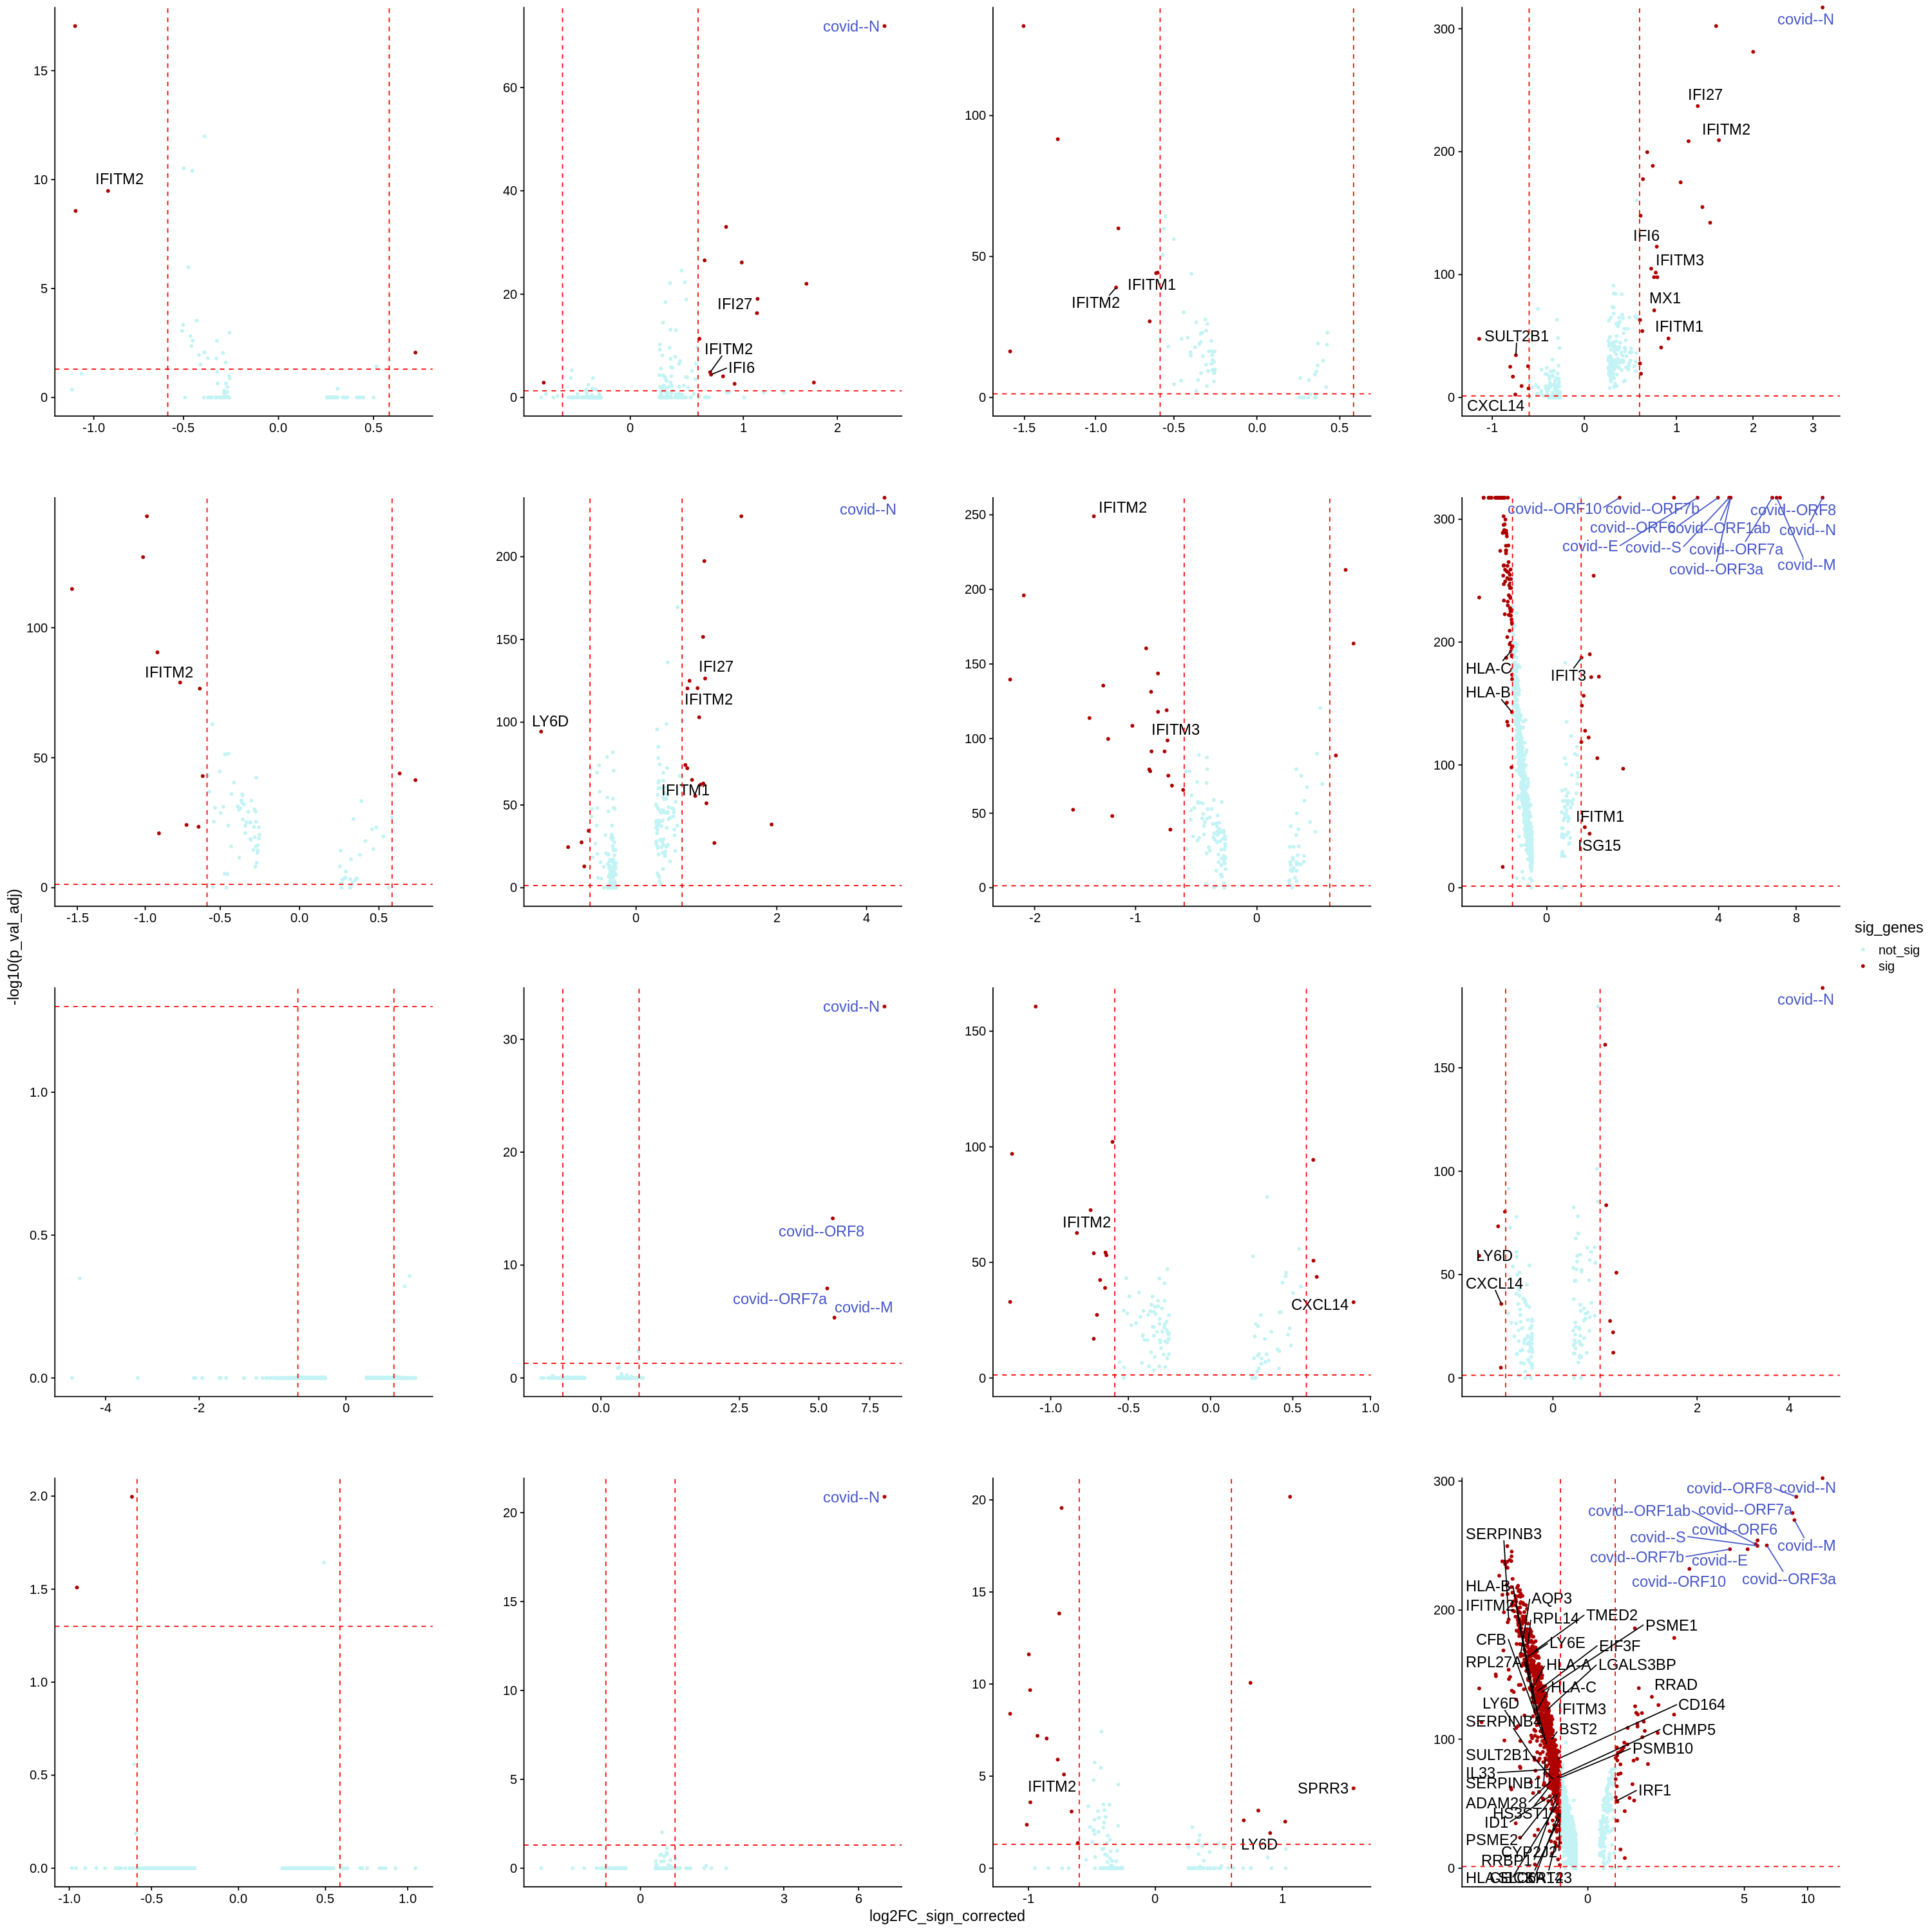

In [53]:
#label interferome genes only

options(repr.plot.width=25, repr.plot.height=25)
options(ggrepel.max.overlaps = Inf)

ggplot(stats) +
        geom_point(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), colour=sig_genes), size = 1)+
scale_color_manual(values=c('#C3F3F4', "#ae0000"))+
geom_text_repel(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), 
                    label = covid_genes), size = 5, force = 20, color = '#4757C9')+
geom_text_repel(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), 
                    label = interferome_genes), size = 5, force = 20, color = 'black')+


#fold change of 1.5: 2^x = 1.5 --> x (ln 2) = ln(1.5) --> x=0.584
geom_vline(xintercept = -0.585, linetype = "dashed", color = "red", size = 0.5)+

geom_vline(xintercept = 0.585, linetype = "dashed", color = "red", size = 0.5)+

#p val adjusted: -log10(0.05) = 1.3
geom_hline(yintercept = 1.30, linetype = "dashed", color = "red", size = 0.5)+
theme(panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(), 
      panel.background = element_blank(),
      axis.line = element_line(colour = "black"),
      strip.text.x = element_blank(),
      strip.background = element_blank(),
        panel.spacing = unit(4, "lines"))+
#scale_y_continuous(trans=scales::pseudo_log_trans(base = 10))+
scale_x_continuous(trans=scales::pseudo_log_trans(base = 10))+

facet_wrap(~celltype, ncol = 4, scales = "free")+
  coord_cartesian(clip = "off")

setwd('/home/jovyan/data/covid_nasal/figures')
ggsave("volcano_plot_interferome_ISGs_unlabelled.png", plot = last_plot(), device = NULL, path = NULL,width = 25, 
      height = 25,  scale = 1)

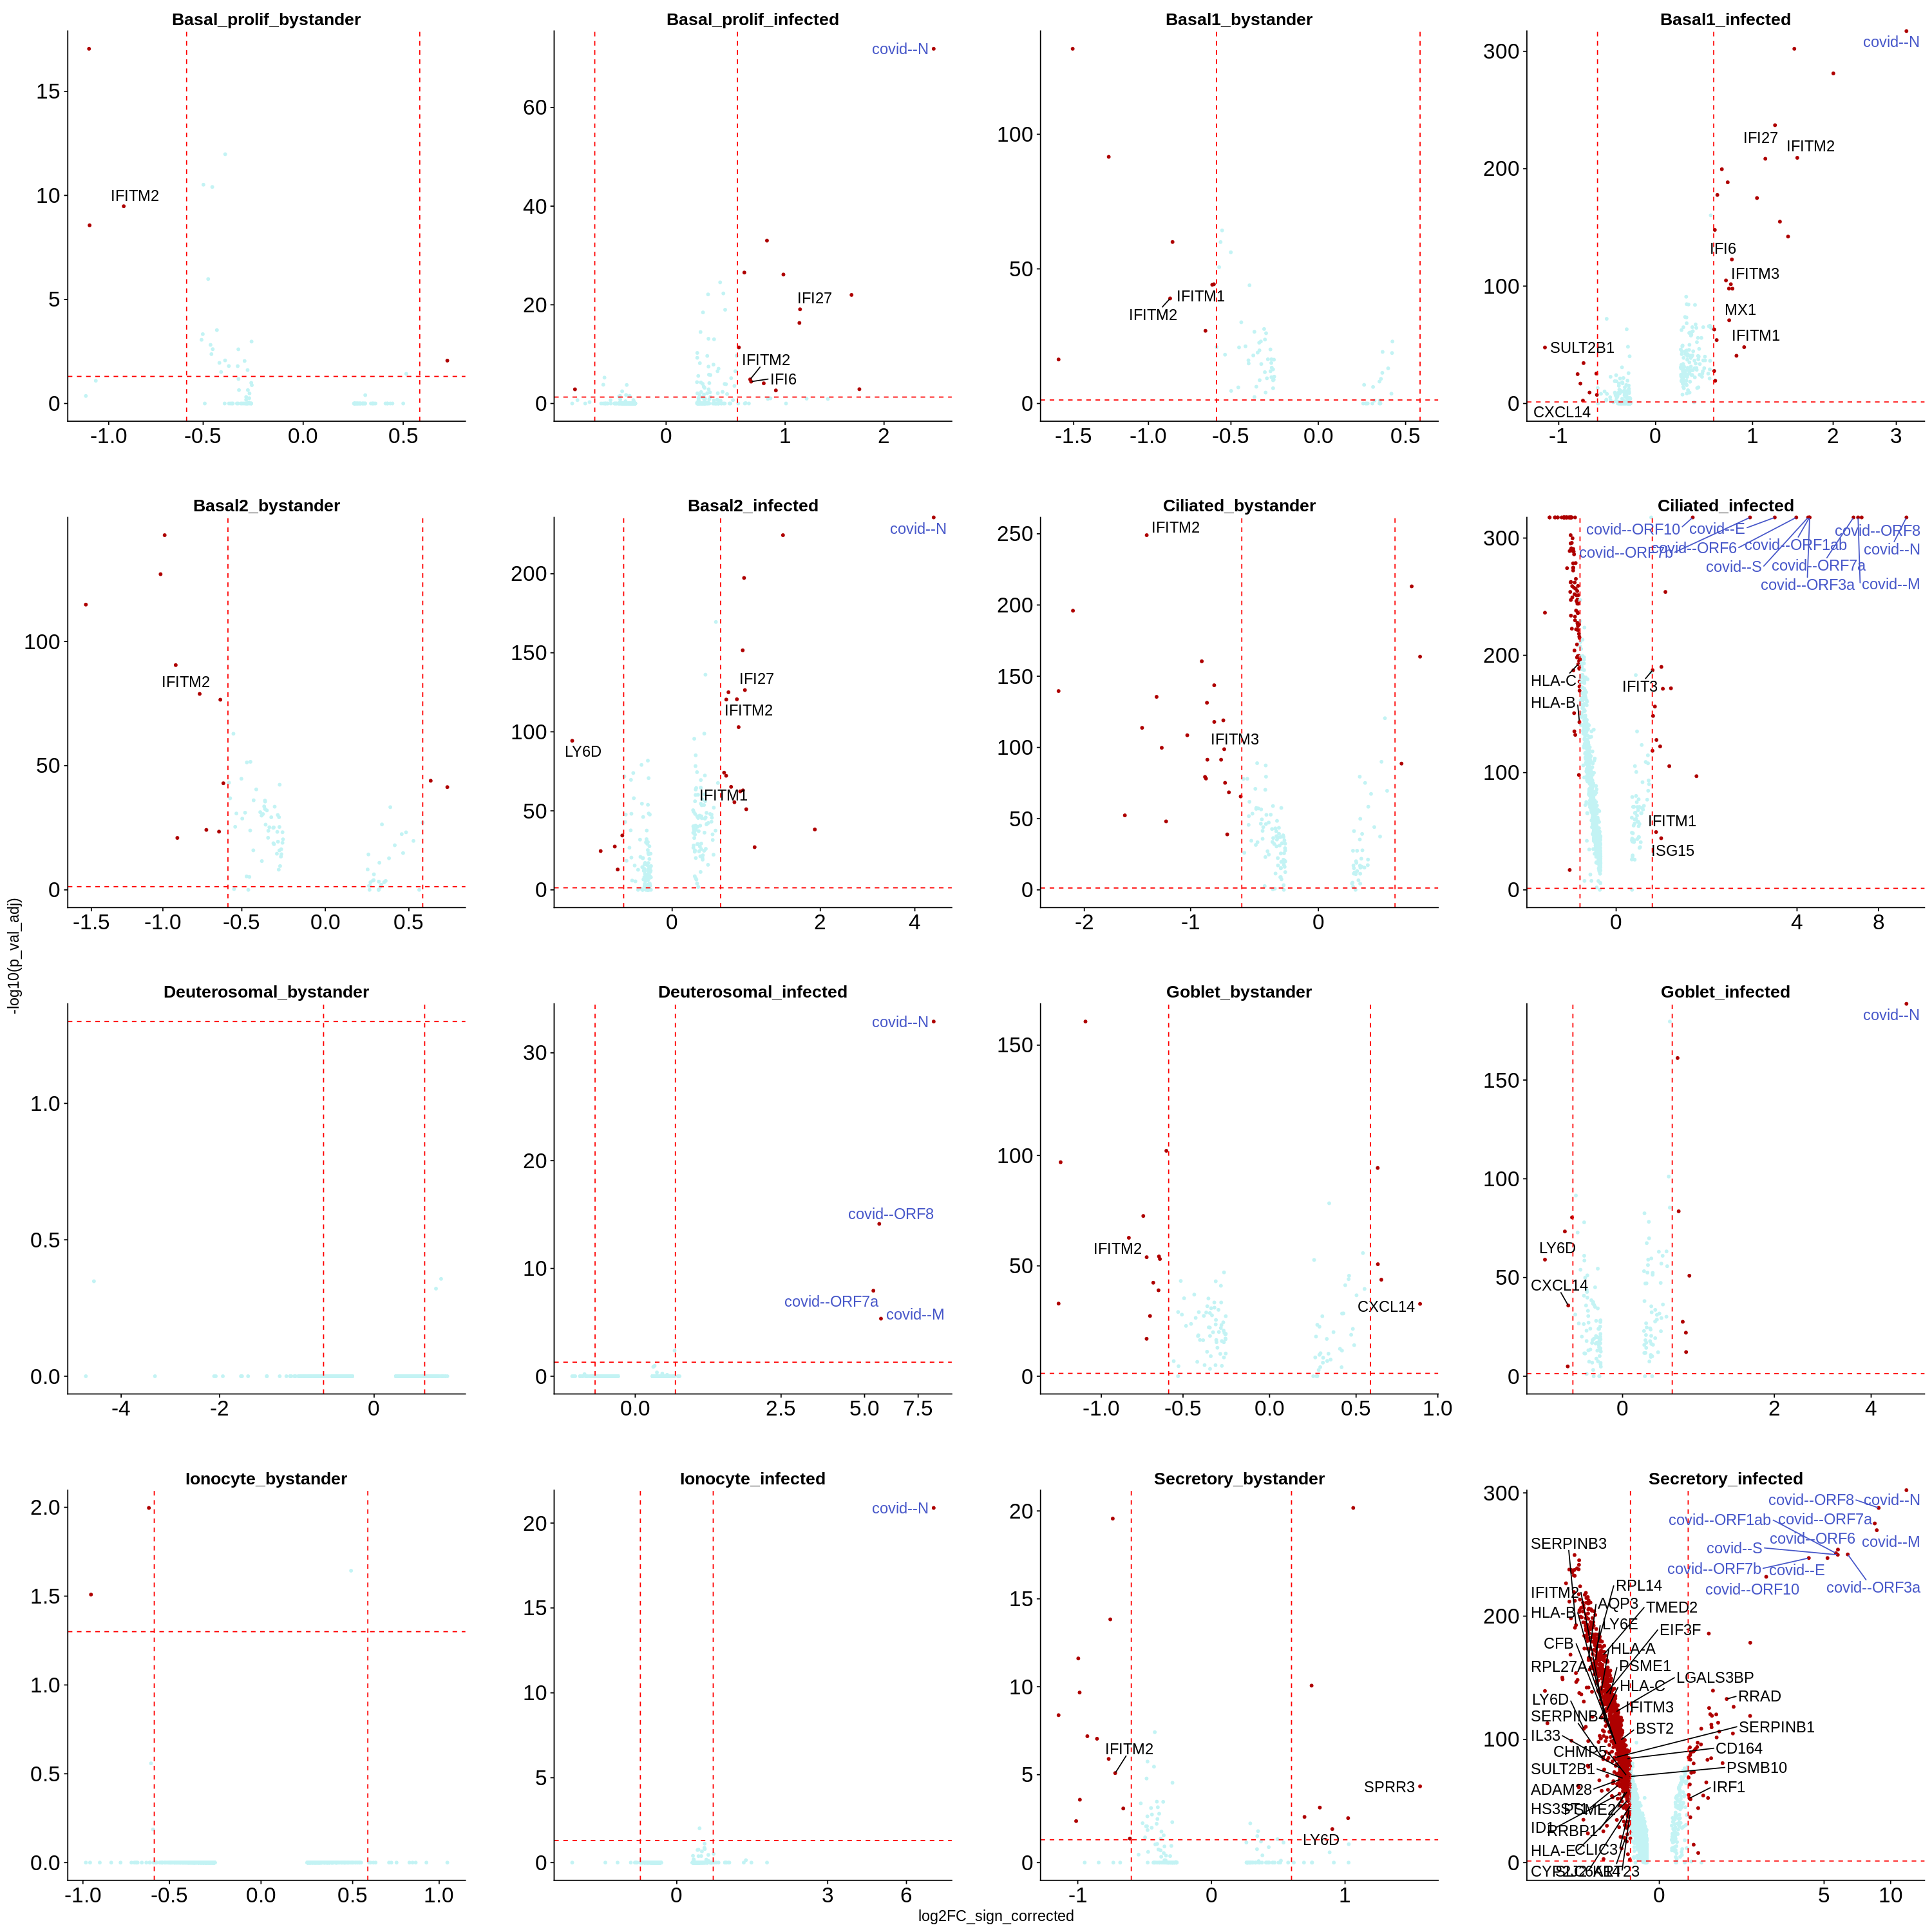

In [57]:
#label interferome genes only

options(repr.plot.width=25, repr.plot.height=25)
options(ggrepel.max.overlaps = Inf)

ggplot(stats) +
        geom_point(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), colour=sig_genes), size = 1)+
scale_color_manual(values=c('#C3F3F4', "#ae0000"))+
geom_text_repel(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), 
                    label = covid_genes), size = 5, force = 20, color = '#4757C9')+
geom_text_repel(aes(x=log2FC_sign_corrected, y=-log10(p_val_adj), 
                    label = interferome_genes), size = 5, force = 20, color = 'black')+


#fold change of 1.5: 2^x = 1.5 --> x (ln 2) = ln(1.5) --> x=0.584
geom_vline(xintercept = -0.585, linetype = "dashed", color = "red", size = 0.5)+

geom_vline(xintercept = 0.585, linetype = "dashed", color = "red", size = 0.5)+

#p val adjusted: -log10(0.05) = 1.3
geom_hline(yintercept = 1.30, linetype = "dashed", color = "red", size = 0.5)+
theme(panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(), 
      panel.background = element_blank(),
      axis.line = element_line(colour = "black"),
      axis.text = element_text(size =20),
  
      strip.text.x = element_text(size = 16, color = "black", face = "bold"),
      strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
     legend.position = 'none')+
#scale_y_continuous(trans=scales::pseudo_log_trans(base = 10))+
scale_x_continuous(trans=scales::pseudo_log_trans(base = 10))+

facet_wrap(~celltype, ncol = 4, scales = "free")+
  coord_cartesian(clip = "off")

setwd('/home/jovyan/data/covid_nasal/figures')
ggsave("volcano_plot_interferome_ISGs_labelled.png", plot = last_plot(), device = NULL, path = NULL,width = 25, 
      height = 25,  scale = 1)



***Differential gene expression***



In [5]:
setwd('/home/jovyan/data/covid_nasal/datasets')
covid<-readRDS("covid_integrated.RDS")

In [8]:
##Create a new identity class based on whether cell is infected
uninfected <- subset(x = covid, 
                     subset = `covid--ORF1ab` == 0 &
                     `covid--S` == 0 &
                     `covid--ORF3a` == 0 &
                     `covid--E` == 0 &
                     `covid--M` == 0 &
                     `covid--ORF6` == 0 &
                     `covid--ORF7a` == 0 &
                     `covid--ORF8` == 0 &
                     `covid--N` == 0 &
                     `covid--ORF10` == 0
                     , slot='counts')

infected_cells<-setdiff(colnames(covid), colnames(uninfected))

Idents(object = covid, cells = Cells(uninfected)) <- 'uninfected'
Idents(object = covid, cells = infected_cells) <- 'infected'

covid[["infection"]] <- Idents(covid)

In [7]:
#between clusters

Idents(covid)<-'initial_clustering'
stats<-FindAllMarkers(covid, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

setwd('/home/jovyan/data/covid_nasal/stats')
write.csv(stats, 'initial_clustering_stats.csv')

Calculating cluster Ionocyte

Calculating cluster Deuterosomal

Calculating cluster Ciliated

Calculating cluster Goblet

Calculating cluster Secretory

Calculating cluster Basal_prolif

Calculating cluster Basal2

Calculating cluster Basal1



In [19]:
covid@meta.data$combined<-paste0(covid@meta.data$Treatment, '_', covid@meta.data$infection)
unique(covid@meta.data$combined)

[1] "Neg_uninfected" "Neg_infected"   "Pos_uninfected" "Pos_infected"

In [20]:
#by cluster, between untreated and bystander

Idents(covid)<-'combined'
covid_compare<-subset(covid, id = c('Neg_uninfected', 'Pos_uninfected'))

stats<-data.frame()

for (i in unique(covid_compare@meta.data$initial_clustering)){
     Idents(covid_compare)<-'initial_clustering'
     test<-subset(covid_compare, id = i)
     Idents(test)<-'combined'
     stats_temp<-FindAllMarkers(test, min.pct = 0.25, logfc.threshold = 0.25, only.pos = TRUE)
     stats_temp$celltype<-paste0(i)
     stats_temp$gene<-rownames(stats_temp)
     stats<-rbind(stats, stats_temp)
    }

setwd('/home/jovyan/data/covid_nasal/stats')
write.csv(stats, 'untreated_vs_bystander_stats.csv')

Calculating cluster Neg_uninfected

Calculating cluster Pos_uninfected

Calculating cluster Neg_uninfected

Calculating cluster Pos_uninfected

Calculating cluster Neg_uninfected

Calculating cluster Pos_uninfected

Calculating cluster Neg_uninfected

Calculating cluster Pos_uninfected

Calculating cluster Neg_uninfected

Calculating cluster Pos_uninfected

Calculating cluster Neg_uninfected

Calculating cluster Pos_uninfected

Calculating cluster Neg_uninfected

Calculating cluster Pos_uninfected

Calculating cluster Neg_uninfected

Calculating cluster Pos_uninfected



In [24]:
#by cluster, between untreated and infected

Idents(covid)<-'combined'
covid_compare<-subset(covid, id = c('Neg_uninfected', 'Pos_infected'))

stats<-data.frame()

for (i in unique(covid_compare@meta.data$initial_clustering)){
     Idents(covid_compare)<-'initial_clustering'
     test<-subset(covid_compare, id = i)
     Idents(test)<-'combined'
     stats_temp<-FindAllMarkers(test, min.pct = 0.25, logfc.threshold = 0.25, only.pos = TRUE)
     stats_temp$celltype<-paste0(i)
     stats_temp$gene<-rownames(stats_temp)
     stats<-rbind(stats, stats_temp)
    }

setwd('/home/jovyan/data/covid_nasal/stats')
write.csv(stats, 'untreated_vs_infected_stats.csv')

Calculating cluster Neg_uninfected

Calculating cluster Pos_infected

Calculating cluster Neg_uninfected

Calculating cluster Pos_infected

Calculating cluster Neg_uninfected

Calculating cluster Pos_infected

Calculating cluster Neg_uninfected

Calculating cluster Pos_infected

Calculating cluster Neg_uninfected

Calculating cluster Pos_infected

Calculating cluster Neg_uninfected

Calculating cluster Pos_infected

Calculating cluster Neg_uninfected

Calculating cluster Pos_infected

Calculating cluster Neg_uninfected

Calculating cluster Pos_infected

